In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
# plt.rcParams['figure:figsize'] = [16,9]
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
from sklearn.model_selection import train_test_split
import env

In [3]:
from scipy import stats

In [4]:
import acquire as a
import prepare as p
import explore as e

See acquire functions

In [5]:
[function for function in dir(a) if callable(getattr(a, function))]

['get_connection', 'get_iris_data', 'get_telco_data', 'get_titanic_data']

See prepare functions

In [6]:
[function for function in dir(p) if callable(getattr(p, function))]

['prep_iris', 'prep_telco', 'prep_titanic', 'split_data', 'train_test_split']

See explore functions

In [7]:
[function for function in dir(e) if callable(getattr(e, function))]

['explore_bivariate_cat_to_cat_target',
 'explore_bivariate_cont_to_cat_target',
 'explore_univariate_categorical_cols',
 'explore_univariate_continuous_cols',
 'get_cat_and_cont_cols']

## Acquire

#### 4. Acquire iris data

In [7]:
# Create a pandas dataframe, iris, from this data.
iris = sns.load_dataset('iris')

# print the first 3 rows
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [8]:
# print the number of rows and columns (shape)
iris.shape

(150, 5)

In [9]:
# print the column names
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
# print the data type of each column
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [11]:
# print the summary statistics for each of the numeric variables
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<div style="border:1px solid black;"></div>

#### 5. Acquire google data

In [12]:
url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = url.replace('/edit#gid=', '/export?format=csv&gid=')

In [13]:
# return data from url
df_google = pd.read_csv(csv_export_url)

#  export?format=csv

# print the first 3 rows
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [14]:
# print the number of rows and columns
df_google.shape

(891, 12)

In [15]:
# print the column names
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
# print the data type of each column
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
# print the summary statistics for each of the numeric variables
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# print the unique values for each of your categorical variables
for col in df_google.columns:
    if len(df_google[col].unique()) < 10:
        print(f'{col} unique values: {df_google[col].unique()}')

Survived unique values: [0 1]
Pclass unique values: [3 1 2]
Sex unique values: ['male' 'female']
SibSp unique values: [1 0 3 4 2 5 8]
Parch unique values: [0 1 2 5 3 4 6]
Embarked unique values: ['S' 'C' 'Q' nan]


<div style="border:1px solid black;"></div>

#### 6. Acquire excel data

In [19]:
df = pd.read_excel('data/train.xlsx')

In [20]:
# assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = df[:100]

In [21]:
# print the number of rows of your original dataframe
df_excel_sample.shape

(100, 12)

In [22]:
# print the first 5 column names
df_excel_sample.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [23]:
# print the column names that have a data type of object
is_obj_col = df_excel_sample.dtypes == 'object'
df_excel_sample.dtypes[is_obj_col]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [24]:
# or
df_excel_sample.select_dtypes(exclude='number').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [25]:
# compute the range for each of the numeric variables.
col_stats = df_excel_sample.describe().T
col_stats['range'] = col_stats['max'] - col_stats['min']
col_stats

,count,mean,std,min,25%,50%,75%,max,range
PassengerId,100.0,50.500000,29.011492,1.000,25.75,50.500,75.250000,100.0,99.000
Survived,100.0,0.410000,0.494311,0.000,0.00,0.000,1.000000,1.0,1.000
Pclass,100.0,2.400000,0.816497,1.000,2.00,3.000,3.000000,3.0,2.000
Age,78.0,27.465769,15.278878,0.830,18.25,26.000,34.750000,71.0,70.170
SibSp,100.0,0.730000,1.179411,0.000,0.00,0.000,1.000000,5.0,5.000
Parch,100.0,0.440000,0.967346,0.000,0.00,0.000,0.000000,5.0,5.000
Fare,100.0,29.517625,40.972905,7.225,8.05,15.675,32.134375,263.0,255.775


## Prepare

Use Iris Data

In [26]:
iris = a.get_iris_data()

In [27]:
# Drop the species_id and measurement_id columns.
cols_to_drop = ['species_id', 'measurement_id']
iris = iris.drop(columns=cols_to_drop)

In [28]:
# Rename the species_name column to just species.
iris = iris.rename(columns={'species_name':'species'})
iris.columns

Index(['species', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width'],
      dtype='object')

In [29]:
# Create dummy variables of the species name and concatenate onto the iris dataframe. 
# (This is for practice, we don't always have to encode the target, 
# but if we used species as a feature, we would need to encode it).
dummy_df = pd.get_dummies(iris['species'], drop_first=True)
dummy_df.head(2)

,versicolor,virginica
0,0,0
1,0,0


In [30]:
iris = pd.concat([iris, dummy_df], axis=1)
iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [31]:
# Create a function named prep_iris that accepts the untransformed iris data,
# and returns the data with the transformations above applied.
## Down below, and in prepare.py

Use the Titanic dataset

In [32]:
# Use the function defined in acquire.py to load the Titanic data.
titanic = a.get_titanic_data()
display(titanic.head(1))

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.25,S,Third,NaN,Southampton,0


Drop any unnecessary, unhelpful, or duplicated columns.


In [33]:
# getting value counts of categorical columns
[display(titanic[col].value_counts(dropna=False)) for col in titanic.columns
                                            if len(titanic[col].unique()) < 10]
print('Print titanic info:\n')
titanic.info()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: embark_town, dtype: int64

1    537
0    354
Name: alone, dtype: int64

Print titanic info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [34]:
# dropping embarked column
cols_to_drop = ['embarked', 'pclass','deck']
titanic = titanic.drop(columns=cols_to_drop)

In [35]:
# Encode the categorical columns. Create dummy variables of the categorical 
# columns and concatenate them onto the dataframe.

dummy_df = pd.get_dummies(titanic[['embark_town', 'class', 'sex']], dummy_na=False, drop_first=True)
titanic = pd.concat([titanic, dummy_df], axis=1)
titanic.head(1)

,passenger_id,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,class_Second,class_Third,sex_male
0,0,0,male,22.0,1,0,7.25,Third,Southampton,0,0,1,0,1,1


Use the Telco dataset

In [23]:
# Use the function defined in acquire.py to load the Telco data.
telco = a.get_telco_data()
telco.head(5)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


Note: those who have "No internet service" in a column have it in other columns

In [24]:
# Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping
# foreign key columns but keeping the corresponding string values, for example.
telco = telco.iloc[:,3:]

# getting value counts of categorical columns
[display(telco[col].value_counts()) for col in telco.columns if len(telco[col].unique()) < 8]
print('Print telco info:\n')
telco.info()

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: senior_citizen, dtype: int64

No     3641
Yes    3402
Name: partner, dtype: int64

No     4933
Yes    2110
Name: dependents, dtype: int64

Yes    6361
No      682
Name: phone_service, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: tech_support, dtype: int64

No                     2810
Yes                    2707
No internet service    1526
Name: streaming_tv, dtype: int64

No                     2785
Yes                    2732
No internet service    1526
Name: streaming_movies, dtype: int64

Yes    4171
No     2872
Name: paperless_billing, dtype: int64

No     5174
Yes    1869
Name: churn, dtype: int64

Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_type, dtype: int64

Print telco info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null 

See why total_charges is an object and handle non-numerical values

In [28]:
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [25]:
telco['total_charges'].value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64

In [39]:
# replace empty space with np.nan and convert column to float
telco['total_charges'] = telco['total_charges'].replace(' ', np.nan).astype(float)
# impute median
telco['total_charges'] = telco['total_charges'].fillna(telco['total_charges'].median())
telco['total_charges'].value_counts(dropna=False).head(2)

1397.475    11
20.200      11
Name: total_charges, dtype: int64

Changing binary categories to 0, 1 where I see No, Yes

In [40]:
binary_cols = ['partner','dependents','phone_service', 'paperless_billing', 'churn']
for col in binary_cols:
    telco[col] = telco[col].replace({'Yes': 1, 'No': 0})

dummy_df = pd.get_dummies(telco[['gender', 'multiple_lines', 'online_security', 'online_backup',
                                 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
                                 'contract_type', 'internet_service_type', 'payment_type']],
                          dummy_na=False, drop_first=True)
telco = pd.concat([telco, dummy_df], axis=1)

In [41]:
# rename columns to be lowercased with underscores
telco.columns = [col.lower().replace(" ", "_") for col in telco.columns]

In [42]:
# Create a function named prep_telco that accepts the raw telco data,
# and returns the data with the transformations above applied.
p.prep_telco().head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_male,multiple_lines_no_phone_service,multiple_lines_yes,online_security_no_internet_service,online_security_yes,online_backup_no_internet_service,online_backup_yes,device_protection_no_internet_service,device_protection_yes,tech_support_no_internet_service,tech_support_yes,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no_internet_service,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_(automatic),payment_type_electronic_check,payment_type_mailed_check
0,0002-ORFBO,Female,0,1,1,9,1,No,No,Yes,No,Yes,Yes,No,1,65.6,593.30,0,One year,DSL,Mailed check,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,0,0,9,1,Yes,No,No,No,No,No,Yes,0,59.9,542.40,0,Month-to-month,DSL,Mailed check,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,0,0,4,1,No,No,No,Yes,No,No,No,1,73.9,280.85,1,Month-to-month,Fiber optic,Electronic check,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


Split your data

In [43]:
# Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.
# function down below and in prepare.py

In [44]:
# Run the function on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.
train_iris, validate_iris, test_iris = p.split_data(p.prep_iris(), validate_size=.15, test_size=.15)
print(len(train_iris), len(validate_iris), len(test_iris))

104 23 23


In [45]:
# Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.
train_titanic, validate_titanic, test_titanic = p.split_data(p.prep_titanic(),
                                                                   stratify_col='survived')
print(len(train_titanic), len(validate_titanic), len(test_titanic))
print(train_titanic.survived.value_counts())
print(validate_titanic.survived.value_counts())
print(test_titanic.survived.value_counts())

534 178 179
0    329
1    205
Name: survived, dtype: int64
0    110
1     68
Name: survived, dtype: int64
0    110
1     69
Name: survived, dtype: int64


In [46]:
# Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.
train_telco, validate_telco, test_telco = p.split_data(p.prep_telco())
print(len(train_telco), len(validate_telco), len(test_telco))

4225 1409 1409


## EDA

#### Part 1

Acquire, prepare & split the iris data.

In [8]:
iris = p.prep_iris()
train_iris, val_iris, test_iris = p.split_data(iris, test_size=.15, validate_size=.15) 
train_iris.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
38,setosa,4.4,3.0,1.3,0.2,0,0
19,setosa,5.1,3.8,1.5,0.3,0,0


In [9]:
cat_cols, cont_cols = e.get_cat_and_cont_cols(train_iris)
cat_cols, cont_cols

(['species', 'versicolor', 'virginica'],
 ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [10]:
display(train_iris.info())
display(train_iris.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 38 to 138
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       104 non-null    object 
 1   sepal_length  104 non-null    float64
 2   sepal_width   104 non-null    float64
 3   petal_length  104 non-null    float64
 4   petal_width   104 non-null    float64
 5   versicolor    104 non-null    uint8  
 6   virginica     104 non-null    uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 5.1+ KB


None

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,5.860577,3.046154,3.766346,1.182692,0.355769,0.317308
std,0.841222,0.450442,1.757017,0.739121,0.481064,0.467682
min,4.400000,2.000000,1.200000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.500000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,1.000000,1.000000
max,7.900000,4.200000,6.900000,2.500000,1.000000,1.000000


##### Univariate Stats

###### Continuous

histogram, boxplot, descriptive stats

Descriptive Stats:



,sepal_length,sepal_width,petal_length,petal_width
count,104.000000,104.000000,104.000000,104.000000
mean,5.860577,3.046154,3.766346,1.182692
std,0.841222,0.450442,1.757017,0.739121
min,4.400000,2.000000,1.200000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.200000,6.900000,2.500000


------------------------------------------------------------ 
 SEPAL_LENGTH 

Most Frequent Values:
6.3    7
5.5    7
5.1    7
Name: sepal_length, dtype: int64


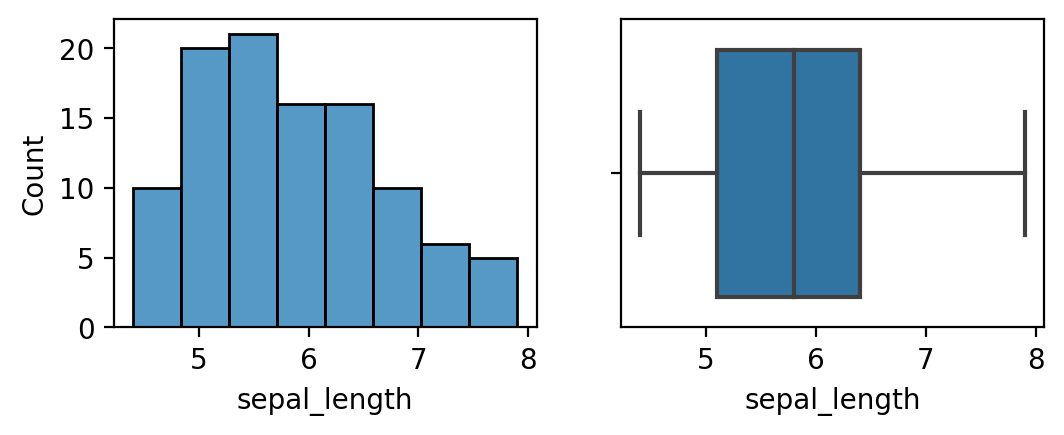


------------------------------------------------------------ 
 SEPAL_WIDTH 

Most Frequent Values:
3.0    14
2.8    10
2.9    10
Name: sepal_width, dtype: int64


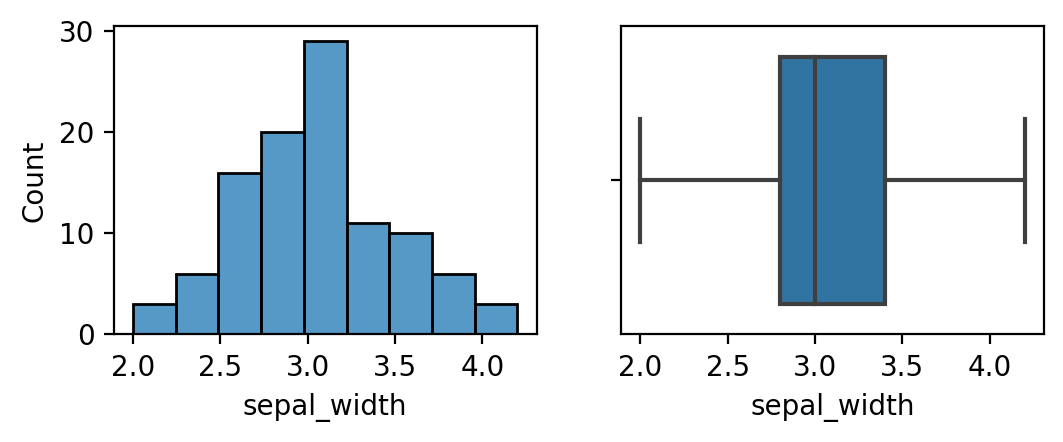


------------------------------------------------------------ 
 PETAL_LENGTH 

Most Frequent Values:
1.5    10
1.4     9
1.3     6
Name: petal_length, dtype: int64


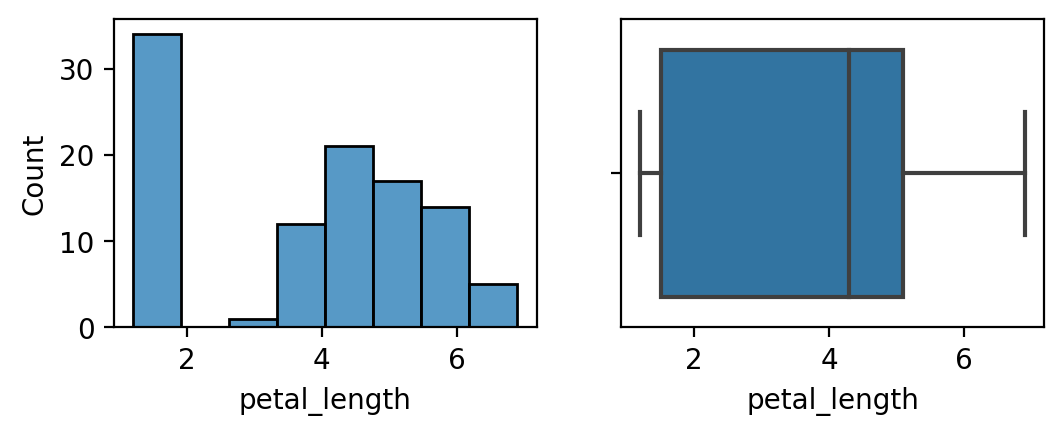


------------------------------------------------------------ 
 PETAL_WIDTH 

Most Frequent Values:
0.2    18
1.3    13
1.8     8
Name: petal_width, dtype: int64


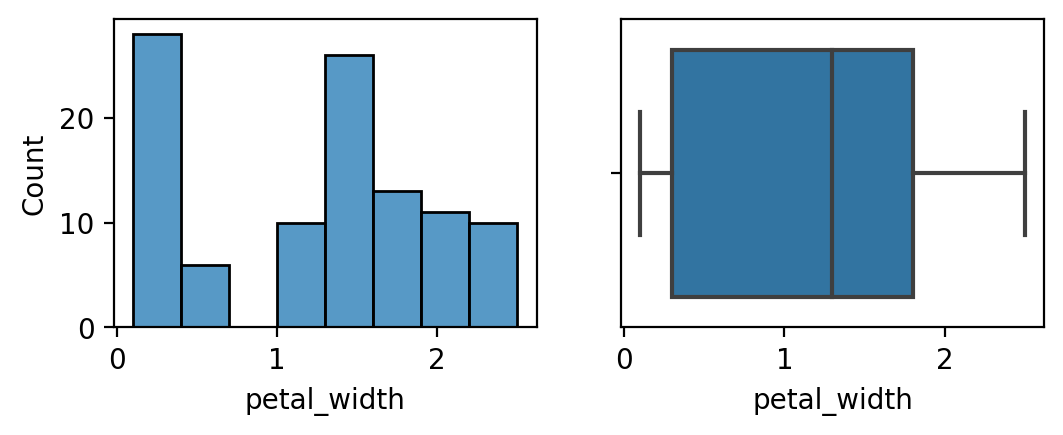

In [11]:
e.explore_univariate_continuous_cols(train_iris)

In [51]:
# # descriptive stats
# display(train_iris[cont_cols].describe())

# for col in cont_cols:
#     print('-'*60, '\n', col.upper(), '\n')
#     # most frequent values
#     print(train_iris[col].value_counts().head(3))
#     # set figure
#     fig, axes = plt.subplots(1, 2, figsize=(6, 2))
#     # histogram
#     sns.histplot(x=col, data=train_iris, ax=axes[0])
#     # boxplot
#     sns.boxplot(x=col, data=train_iris, ax=axes[1])
    
#     plt.show()
#     print()

Takeaways: 

###### Categorical

frequency table, bar plot

SPECIES


,species,Count,Frequency
0,setosa,36,0.346154
1,versicolor,35,0.336538
2,virginica,33,0.317308


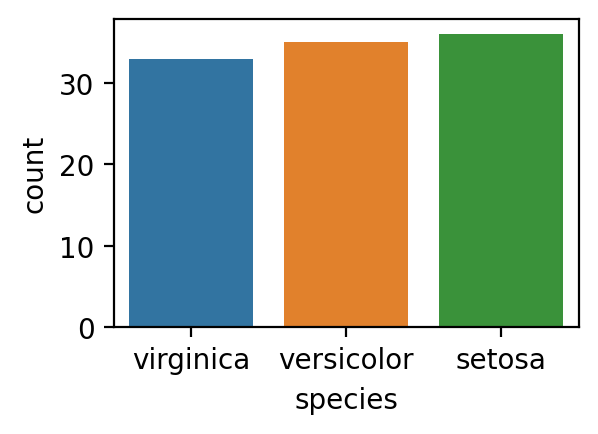

In [52]:
e.explore_univariate_categorical_cols(train_iris, cat_cols=['species'])

In [53]:
# for col in cat_cols:
#     print(col.upper())
#     # ferquency table
#     print(train_iris[col].value_counts())
#     # normalized frequency table
#     print(train_iris[col].value_counts(normalize=True))
#     # bar plot
#     sns.countplot(x=col, data=train_iris)
#     plt.show()
#     print()

Takeaways:


##### Bivariate Stats

Which measurements (cont) relate to the species (cat)?

Bar plot

species                setosa  versicolor  virginica
sepal_length count  34.000000   37.000000  33.000000
             mean    5.014706    5.929730   6.654545
             std     0.345650    0.463000   0.705377
             min     4.400000    5.000000   4.900000
             25%     4.800000    5.600000   6.300000
             50%     5.050000    6.000000   6.500000
             75%     5.200000    6.300000   7.200000
             max     5.800000    6.800000   7.900000
sepal_width  count  34.000000   37.000000  33.000000
             mean    3.435294    2.756757   2.969697
             std     0.382085    0.320191   0.351323
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.500000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.700000    2.900000   3.100000
             max     4.200000    3.400000   3.800000
petal_length count  34.000000   37.000000  33.000000
             mean    1.455882    4.270270   5.581818
             std     0.148101    0.416910   0.595008
             min     1.200000    3.300000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.450000    4.300000   5.600000
             75%     1.500000    4.600000   6.000000
             max     1.900000    5.100000   6.900000
petal_width  count  34.000000   37.000000  33.000000
             mean    0.247059    1.321622   1.990909
             std     0.107971    0.182780   0.287623
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.400000   2.200000
             max     0.600000    1.800000   2.500000

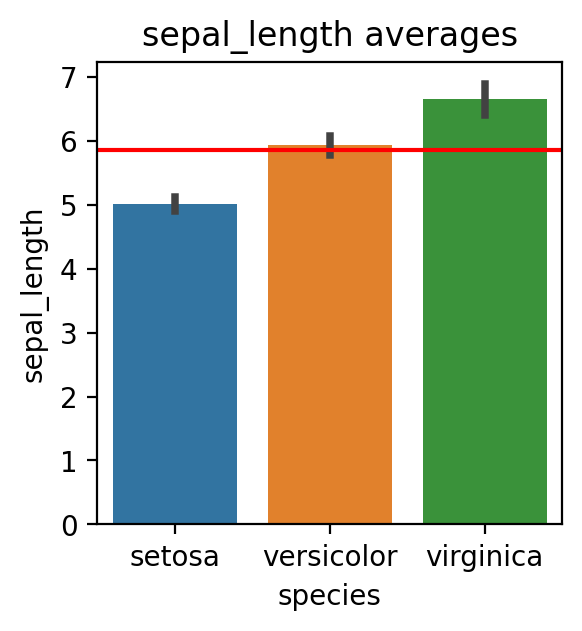

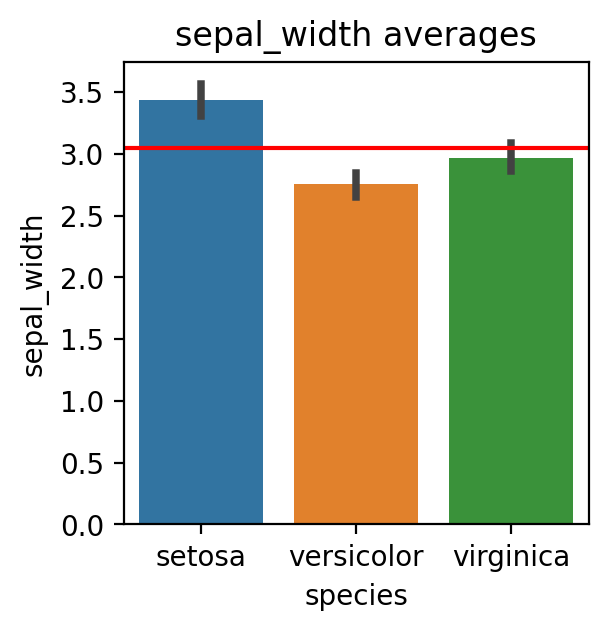

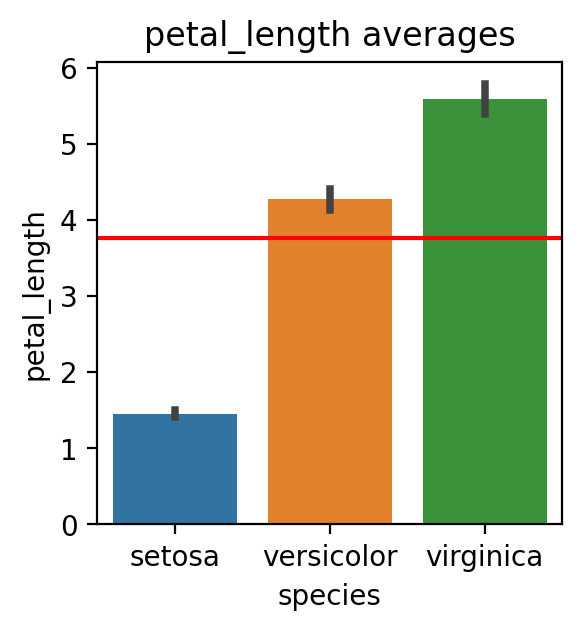

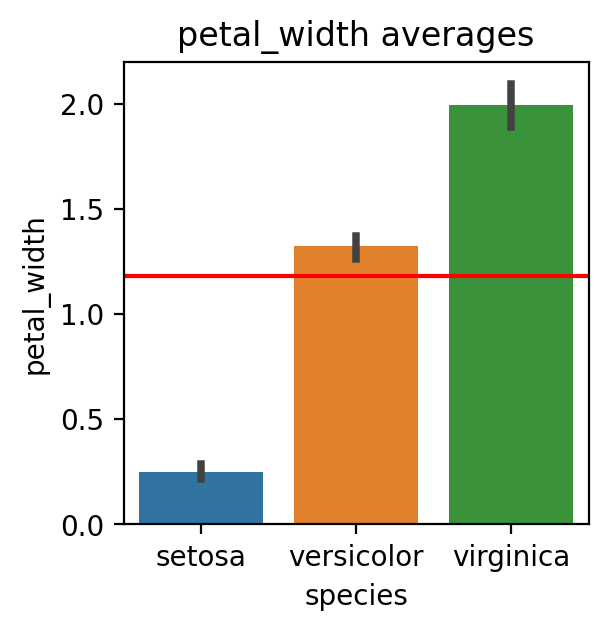

In [12]:
e.explore_bivariate_cont_to_cat_target(train_iris, target='species')

In [55]:
# display(train_iris.groupby('species')[cont_cols].describe().T)

# for col in cont_cols:
#     plt.figure(figsize=(3, 2)) 
#     sns.barplot(x="species", y=col, data=train_iris)
#     pop_col_mean = train_iris[col].mean()
#     plt.axhline(pop_col_mean, label=f'mean {col}')
#     plt.show()

trying to make heatmap of descriptive stats

In [56]:
# descriptive stat for each spe
# grouped_stats = train_iris.groupby('species').describe().T
# grouped_stats
# sns.heatmap(grouped_stats, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)

# plt.title("Descriptive Statistics Heatmap")
# plt.xlabel("Species")
# plt.ylabel("Statistic")

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test to see if there is a significant difference between the two groups. Do the same for the other measurement types.

$H_0$: There is no difference between the mean petal_width of virginica & versicolor

$H_a$: There is a difference between the mean petal_width of virginica & versicolor

$\alpha = .05$

In [57]:
virg_pet_width = train_iris[train_iris['species'] == 'virginica']['petal_width']

vers_pet_width = train_iris[train_iris['species'] == 'versicolor']['petal_width']
t, p_val = stats.mannwhitneyu(virg_pet_width, vers_pet_width)
t, p_val

(1126.0, 1.4277816326325079e-11)

trying to generalize a hypothesis test:

In [58]:
# target_groups = list(train_iris.groupby('species').groups.keys())
# for col in cont_cols:
#     print(col.upper())
#     for i, species in enumerate(target_groups):
#         print(f'H0: There is no difference between the mean {col} of {target_groups[i]}')
#         print(f'Ha: There is a difference between the mean {col} of {target_groups[i+1]}\n alpha = .05')
    

Takeaways: 

##### Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot

In [59]:
train_iris['sepal_area'] = train_iris['sepal_length'] * train_iris['sepal_width']
train_iris['petal_area'] = train_iris['petal_length'] * train_iris['petal_width']
cont_cols = cont_cols + ['sepal_area', 'petal_area']

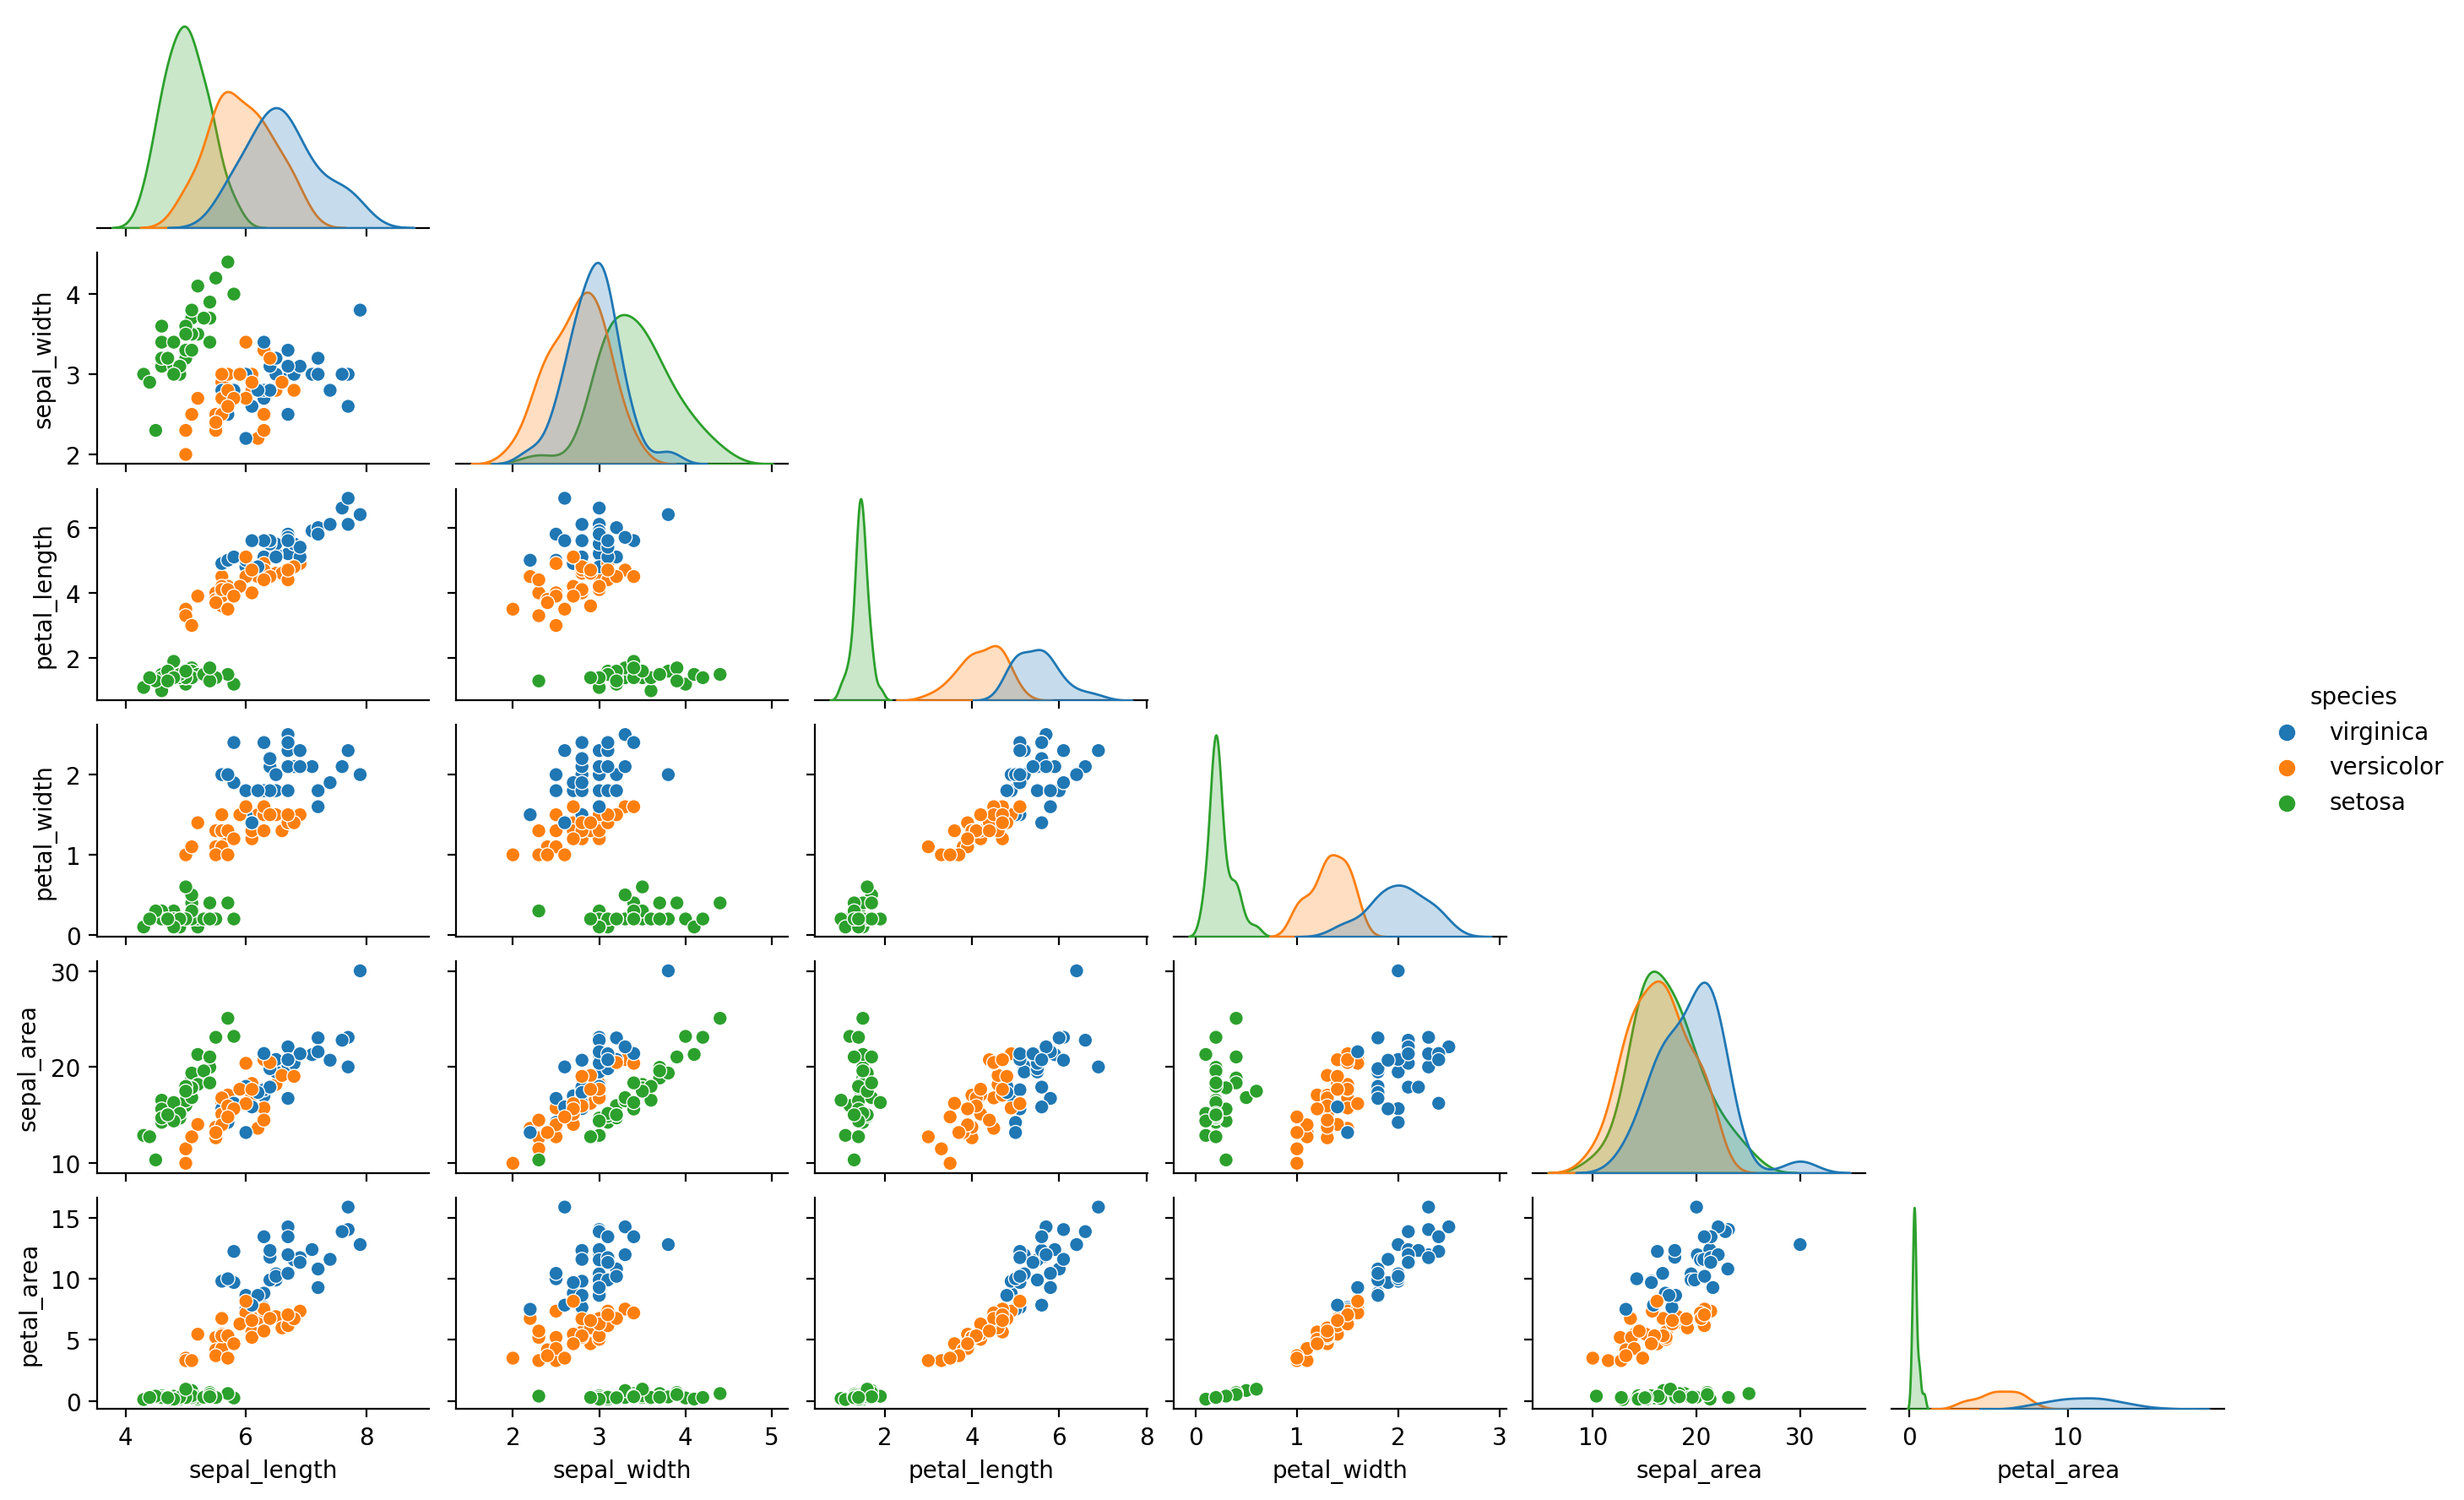

In [60]:
sns.pairplot(train_iris[cont_cols+['species']],
             hue='species', corner=True,
             height=1.5, aspect=1.5)

Visualize petal_width and petal_length of each species

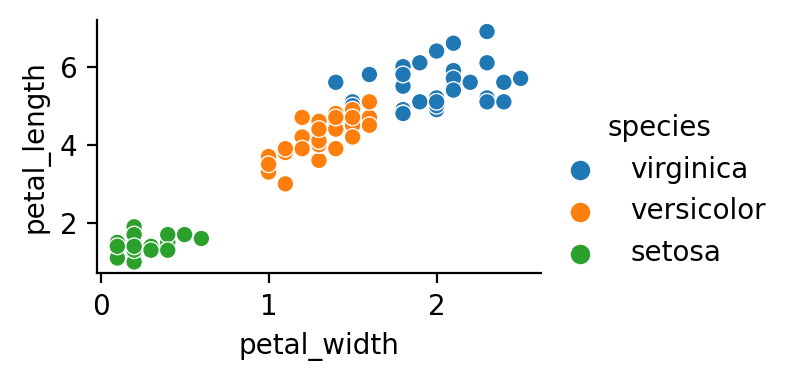

In [61]:
sns.relplot(data=train_iris, x="petal_width", y="petal_length", hue="species", height=2, aspect=1.5)

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species

In [62]:
train_iris.head(1)

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica,sepal_area,petal_area
135,virginica,7.7,3.0,6.1,2.3,0,1,23.1,14.03


In [63]:
melted_df = pd.melt(train_iris[cont_cols + ['species']], id_vars='species',
                    var_name='measurement', value_name='measure')


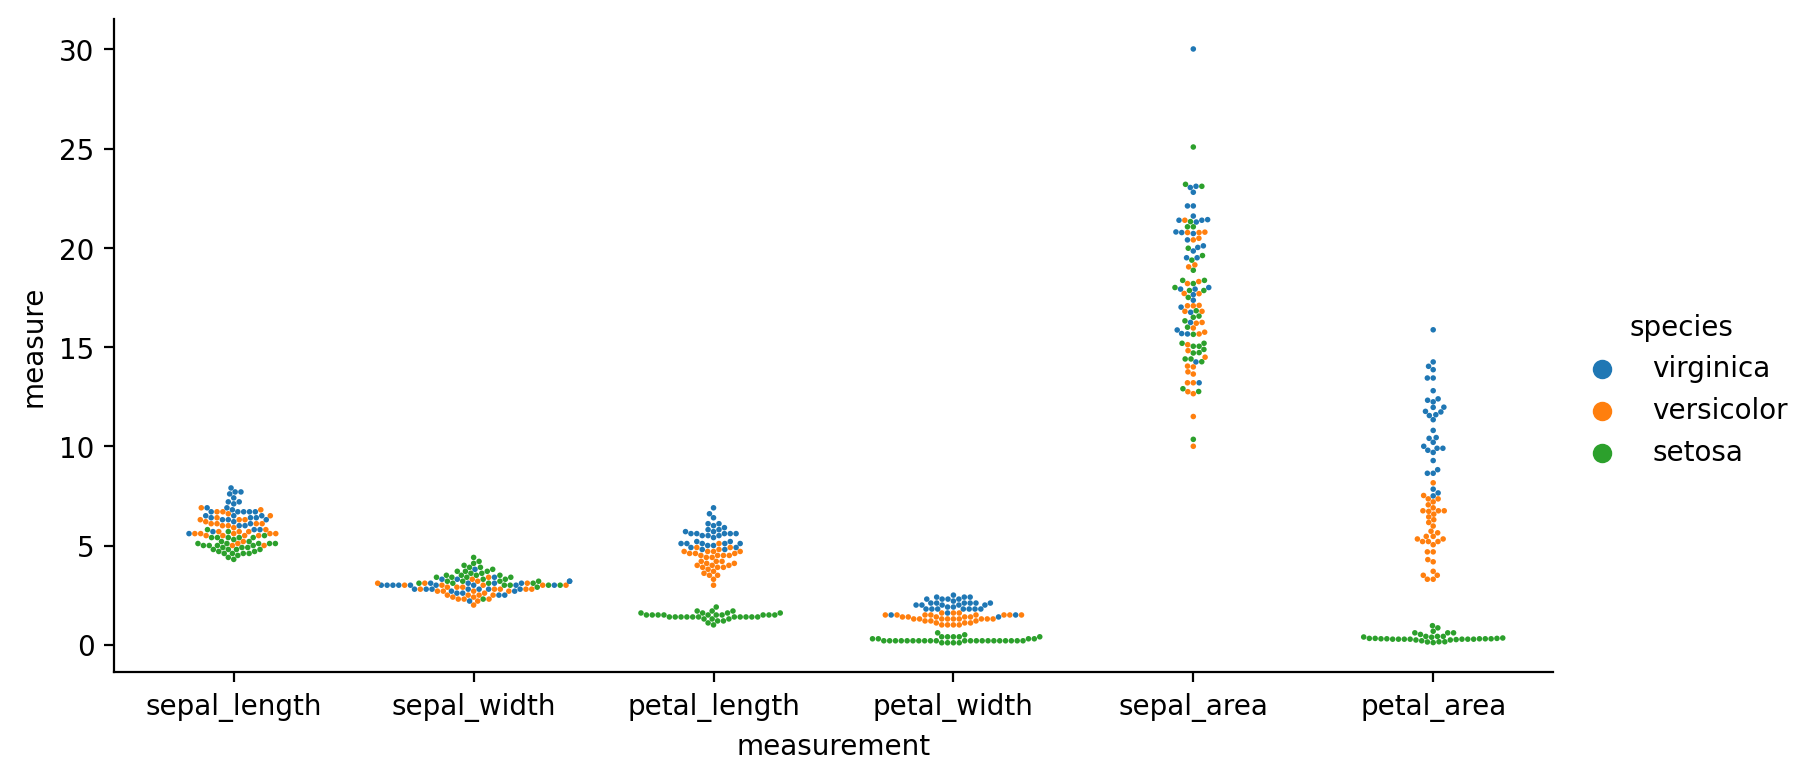

In [64]:
sns.catplot(x='measurement', y='measure', hue='species', data=melted_df, 
              kind='swarm', size=2, height=4, aspect=2)

Is the sepal area signficantly different in virginica compared to setosa?

$H_0$ The sepal area is signficantly different in virginica compared to setosa

$H_a$ The sepal area isn't signficantly different in virginica compared to setosa

$\alpha = .05$

#### Part 2

Explore your titanic dataset more completely.

In [33]:
titanic = p.prep_titanic()
train_titanic, val_titanic, test_titanic = p.split_data(
                                                        titanic,
                                                        test_size=0.15,
                                                        validate_size=0.15,
                                                        stratify_col='survived'
                                                        )
train_titanic.head(2)

,passenger_id,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,embark_town_queenstown,embark_town_southampton,class_second,class_third,sex_male
498,498,0,female,25.0,1,2,151.5500,First,Southampton,0,0,1,0,0,0
424,424,0,male,18.0,1,1,20.2125,Third,Southampton,0,0,1,0,1,1


- Determine drivers of the target variable

In [34]:
cat_cols, cont_cols = e.get_cat_and_cont_cols(train_titanic)
cat_cols = cat_cols[:7] # exclude encoded 
cont_cols = cont_cols[1:] # exclude id
cat_cols, cont_cols

(['survived', 'sex', 'sibsp', 'parch', 'class', 'embark_town', 'alone'],
 ['age', 'fare'])

In [35]:
display(train_titanic.info())
display(train_titanic.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 498 to 341
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             623 non-null    int64  
 1   survived                 623 non-null    int64  
 2   sex                      623 non-null    object 
 3   age                      501 non-null    float64
 4   sibsp                    623 non-null    int64  
 5   parch                    623 non-null    int64  
 6   fare                     623 non-null    float64
 7   class                    623 non-null    object 
 8   embark_town              622 non-null    object 
 9   alone                    623 non-null    int64  
 10  embark_town_queenstown   623 non-null    uint8  
 11  embark_town_southampton  623 non-null    uint8  
 12  class_second             623 non-null    uint8  
 13  class_third              623 non-null    uint8  
 14  sex_male                

None

,passenger_id,survived,age,sibsp,parch,fare,alone,embark_town_queenstown,embark_town_southampton,class_second,class_third,sex_male
count,623.000000,623.000000,501.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,447.105939,0.383628,29.775788,0.545746,0.380417,31.864927,0.592295,0.083467,0.735152,0.199037,0.563403,0.646870
std,260.622169,0.486660,14.691968,1.137243,0.804770,49.306555,0.491803,0.276809,0.441607,0.399597,0.496362,0.478327
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,219.500000,0.000000,21.000000,0.000000,0.000000,7.925000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,451.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,674.500000,1.000000,39.000000,1.000000,0.000000,30.500000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,890.000000,1.000000,74.000000,8.000000,5.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Univariate categorical stats

Descriptive Stats:



,age,fare
count,491.000000,623.000000
mean,29.097760,31.163663
std,14.471656,47.177034
min,0.420000,0.000000
25%,20.000000,7.925000
50%,28.000000,14.458300
75%,36.500000,31.000000
max,80.000000,512.329200


------------------------------------------------------------ 
 AGE 

Most Frequent Values:
18.0    23
24.0    23
30.0    20
Name: age, dtype: int64


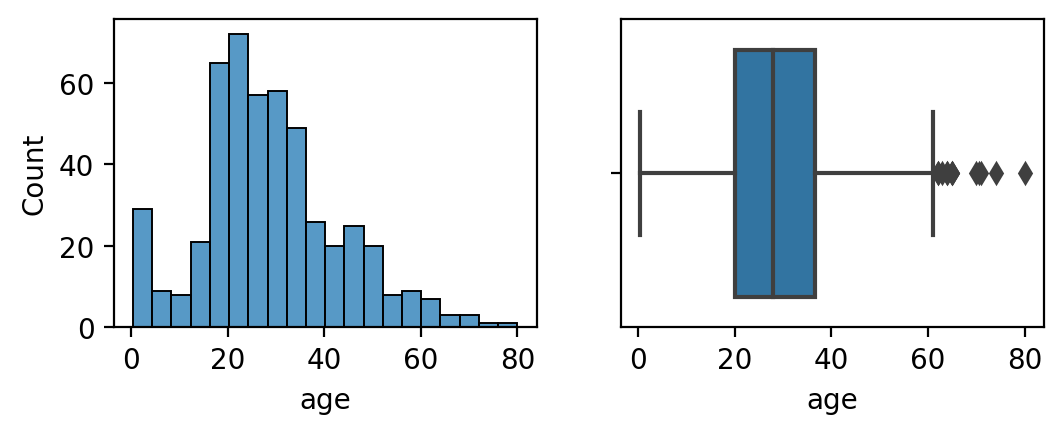


------------------------------------------------------------ 
 FARE 

Most Frequent Values:
13.0000    36
8.0500     26
7.8958     24
Name: fare, dtype: int64


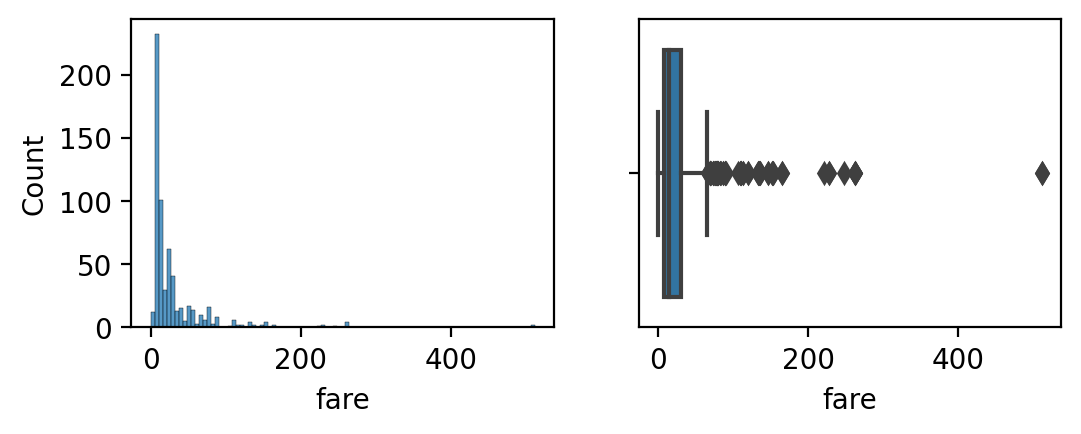

In [68]:
e.explore_univariate_continuous_cols(train_titanic, cont_cols=cont_cols)

Univariate continuous stats

SURVIVED


,survived,Count,Frequency
0,0,384,0.616372
1,1,239,0.383628


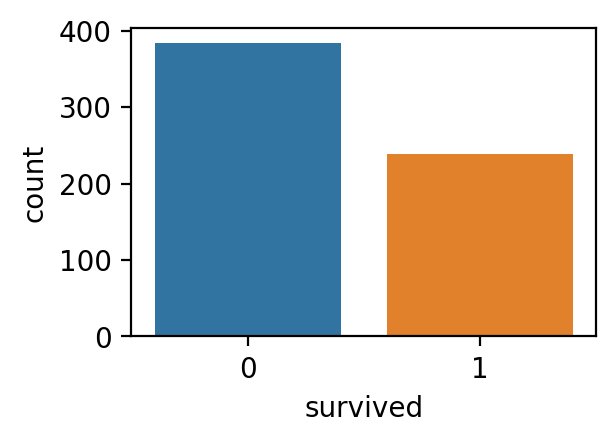


SEX


,sex,Count,Frequency
0,male,392,0.629213
1,female,231,0.370787


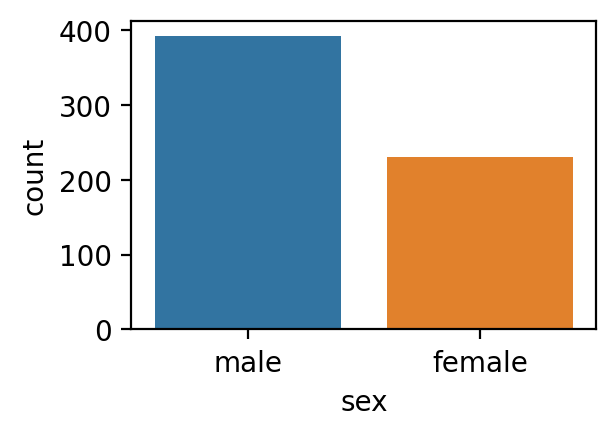


SIBSP


,sibsp,Count,Frequency
0,0,421,0.675762
1,1,148,0.237560
2,2,22,0.035313
3,3,12,0.019262
4,4,10,0.016051
5,8,6,0.009631
6,5,4,0.006421


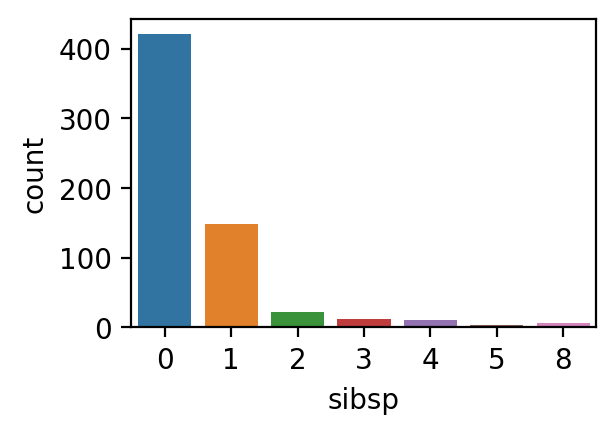


PARCH


,parch,Count,Frequency
0,0,479,0.768860
1,1,81,0.130016
2,2,53,0.085072
3,4,4,0.006421
4,5,4,0.006421
5,3,1,0.001605
6,6,1,0.001605


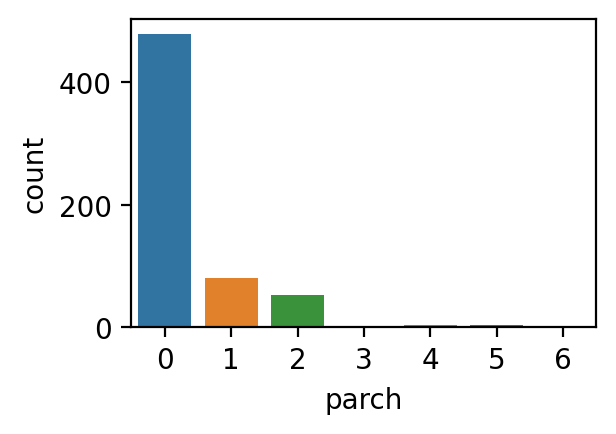


CLASS


,class,Count,Frequency
0,Third,341,0.547352
1,Second,142,0.227929
2,First,140,0.224719


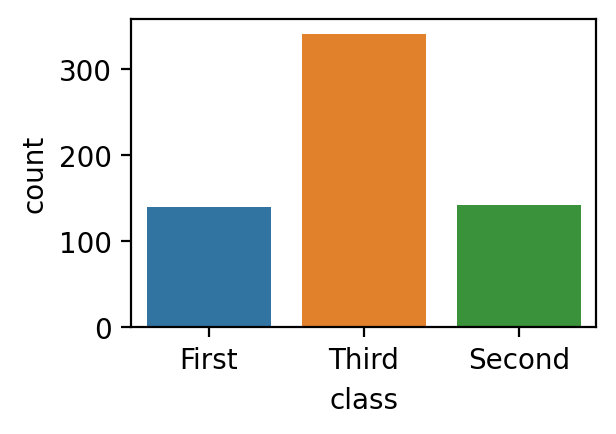


EMBARK_TOWN


,embark_town,Count,Frequency
0,Southampton,448,0.720257
1,Cherbourg,120,0.192926
2,Queenstown,54,0.086817


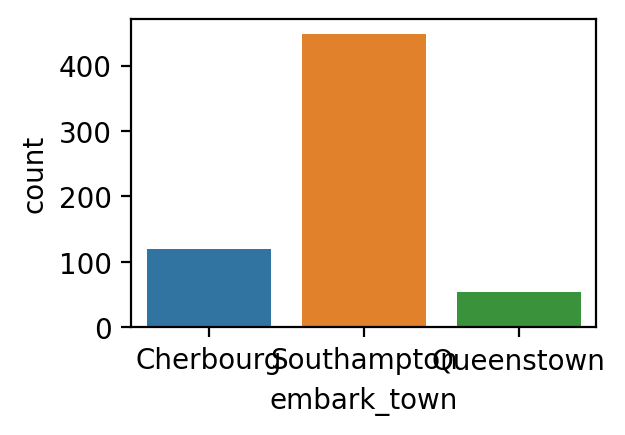


ALONE


,alone,Count,Frequency
0,1,372,0.597111
1,0,251,0.402889


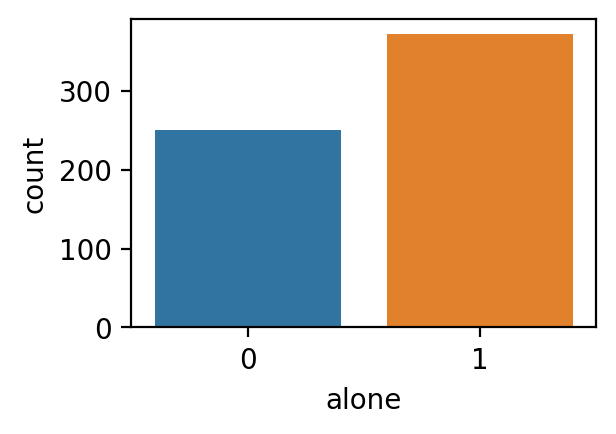

In [69]:
e.explore_univariate_categorical_cols(train_titanic, cat_cols=cat_cols)

Bivariate Stats

Continuous features relation to surviving (categorical target)

survived             0           1
age  count  291.000000  200.000000
     mean    29.890034   27.945000
     std     14.295705   14.683463
     min      1.000000    0.420000
     25%     20.000000   19.000000
     50%     28.000000   27.000000
     75%     37.000000   36.000000
     max     74.000000   80.000000
fare count  384.000000  239.000000
     mean    22.280858   45.435618
     std     31.466890   62.381121
     min      0.000000    0.000000
     25%      7.895800   12.475000
     50%     11.008350   26.000000
     75%     26.000000   56.495800
     max    263.000000  512.329200

Continuous feature correlations (Pearson R) to survived:


survived    1.000000
fare        0.238855
age        -0.066105
Name: survived, dtype: float64

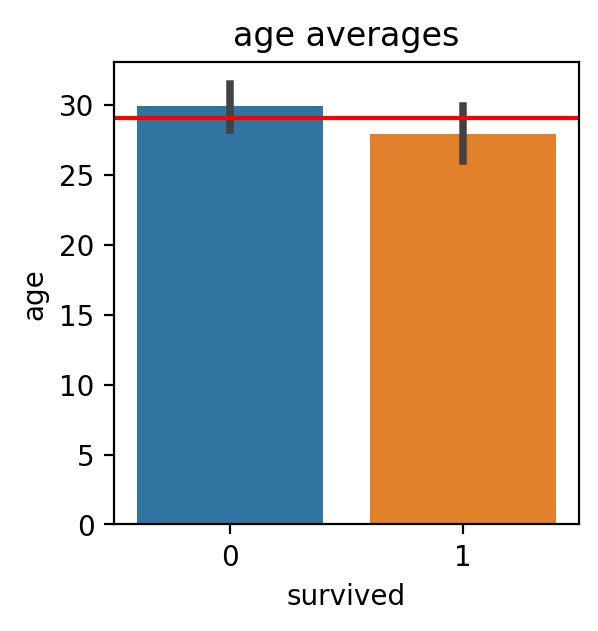

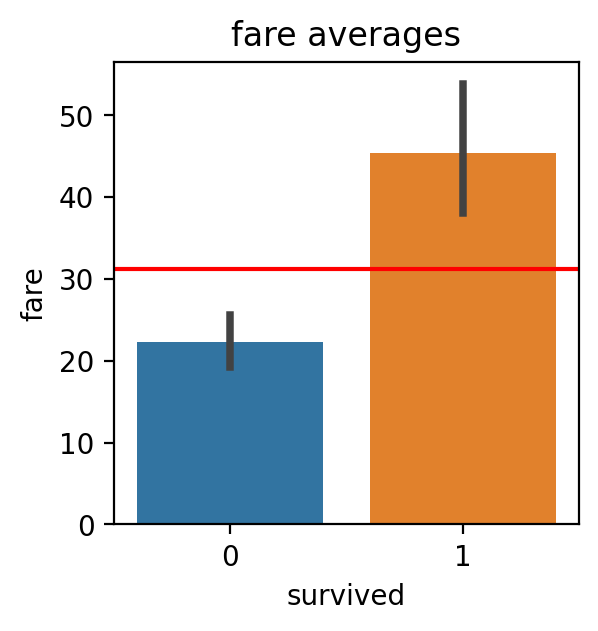

In [70]:
e.explore_bivariate_cont_to_cat_target(train_titanic, target='survived', cont_cols=cont_cols)

Bivariate Stats

Categorical feature relations to surviving (categorical target)

In [71]:
# def explore_bivariate_cat_to_cat_target(df, target, cat_cols=None):
#     '''
#     Explores categorical feature relationships to categorical target
#     '''
#     # set default categorical columns
#     if cat_cols == None:
#         cat_cols = e.get_cat_and_cont_cols(df)[0]
        
#     # display, in order, pearson R "correlations" to the target if target is binary
#     if len(df[target].unique()) == 2:
#         print(f'Categorical feature (integer-type) "correlations" (Pearson R) to {target}:')
#         display(df[cat_cols].corr(numeric_only=True)[target]\
#                                   .sort_values(ascending=False))

#     for col in cat_cols:
#         plt.figure(figsize=(3, 3)) 
#         sns.barplot(x=col, y=target, data=df, estimator='mean')
#         # plt.title(f'{target} averages')
#         # add line indicating estimate of all targets
#         plt.axhline(df[target].mean(), label=f'Total {target} mean', color='red')
#         # plt.legend()
#         plt.show()
#         print()


Categorical feature (integer-type) "correlations" (Pearson R) to survived:


survived                   1.000000
class_second               0.090687
parch                      0.076781
embark_town_queenstown     0.026797
sibsp                     -0.043217
embark_town_southampton   -0.189968
alone                     -0.220135
class_third               -0.303843
sex_male                  -0.597168
Name: survived, dtype: float64

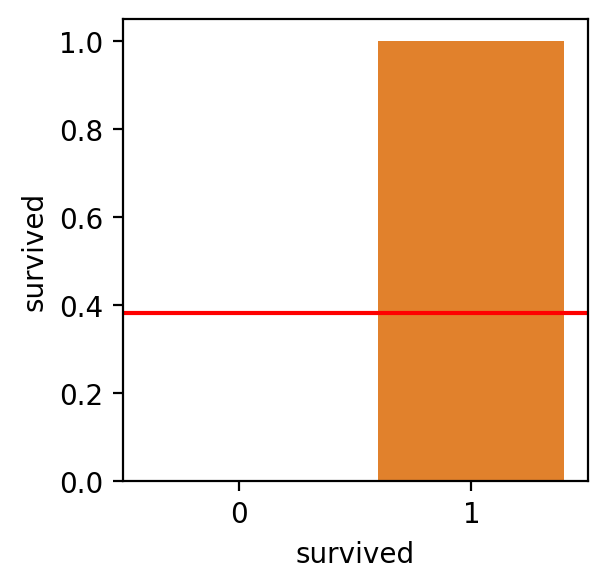

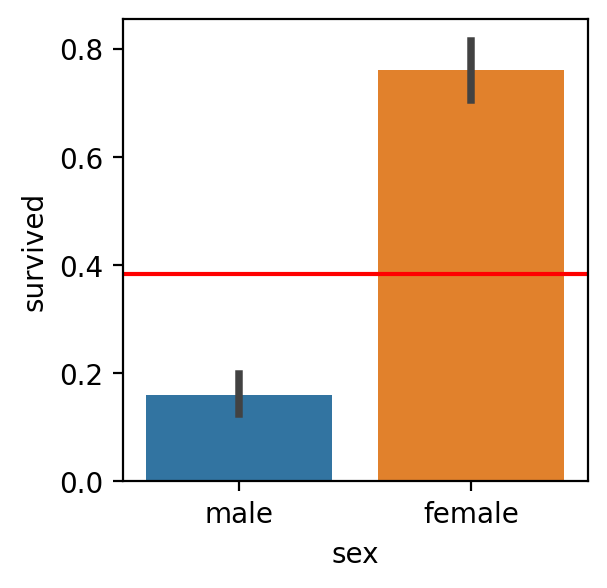

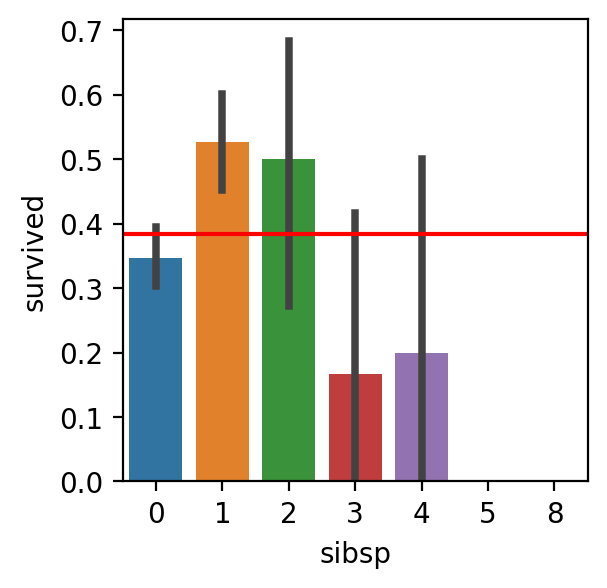

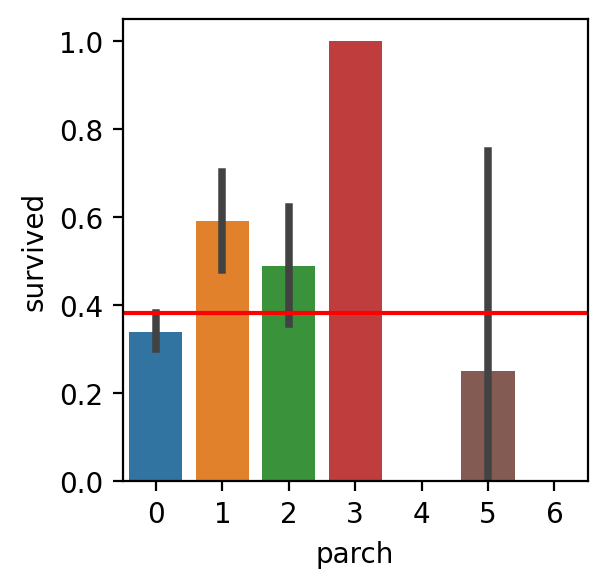

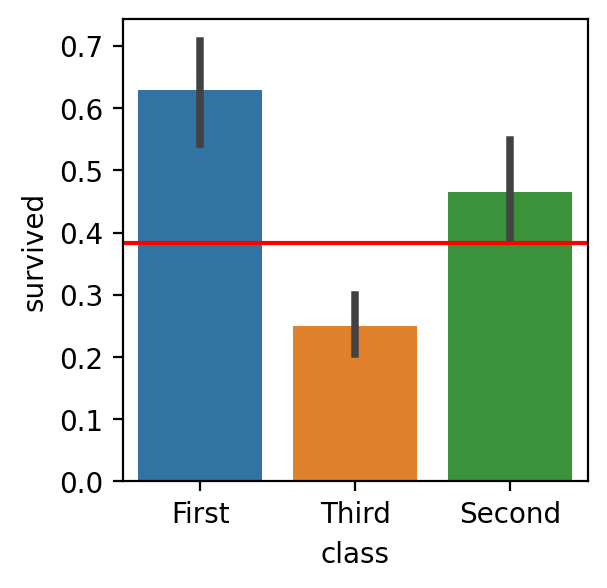

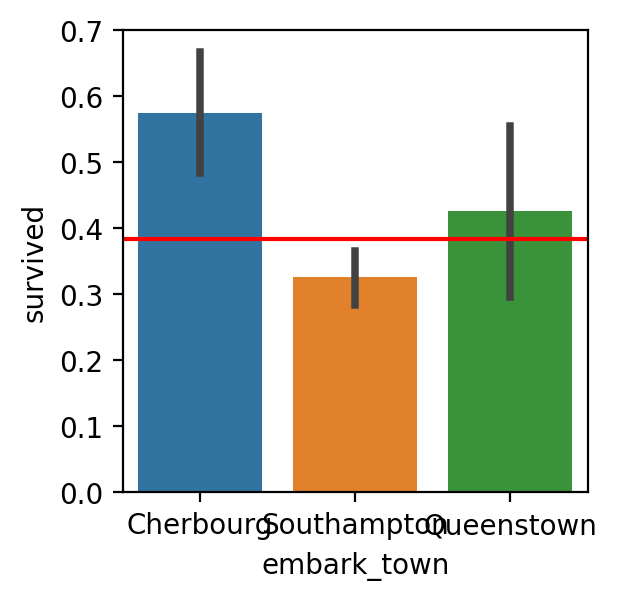

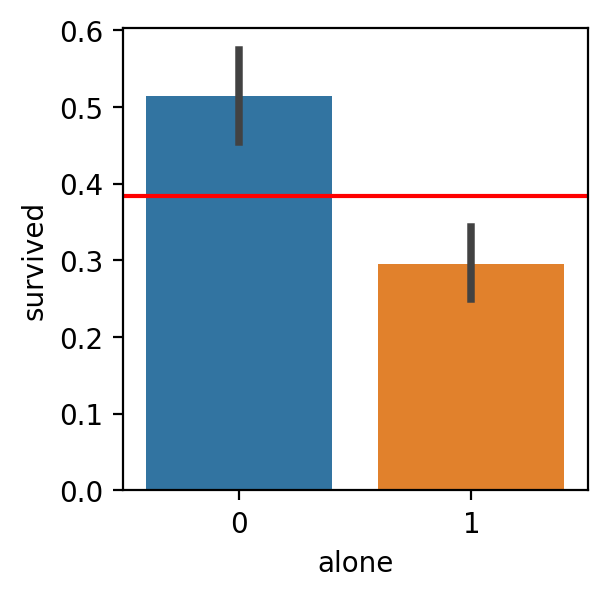

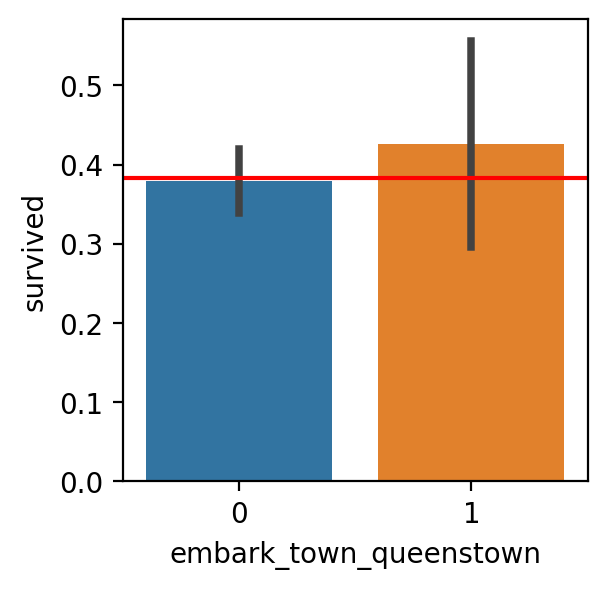

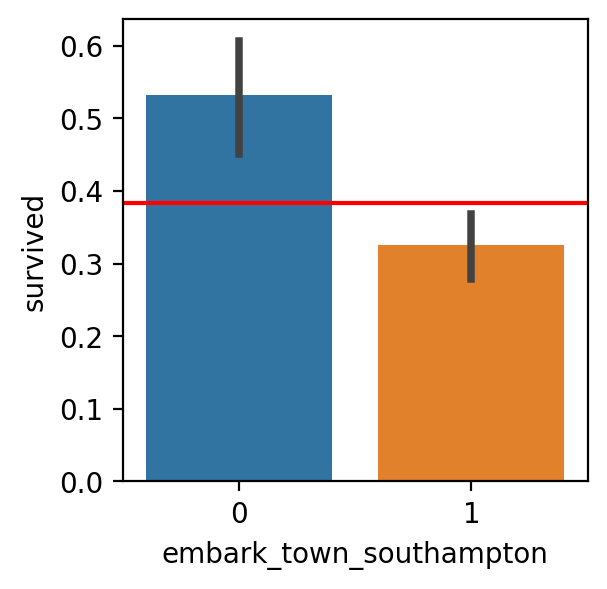

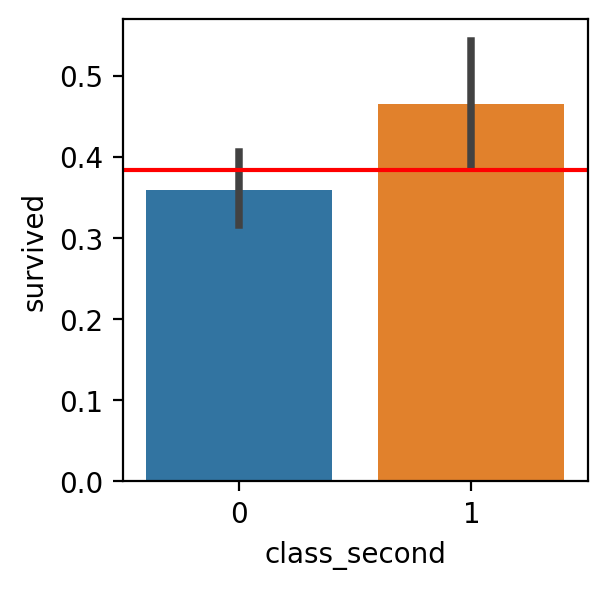

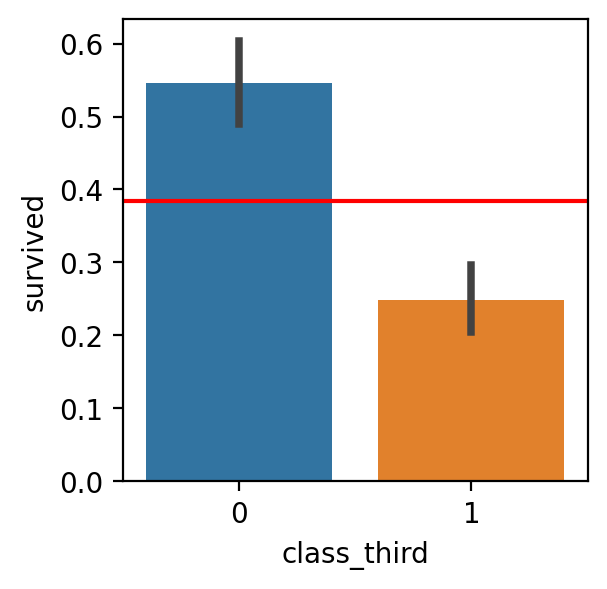

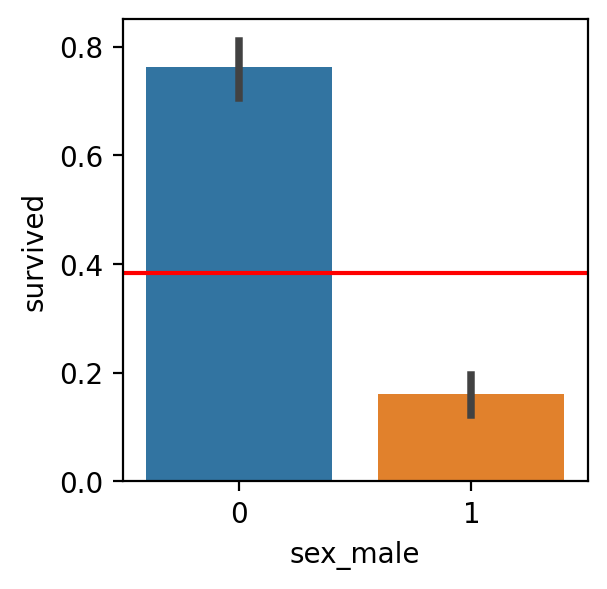

In [72]:
e.explore_bivariate_cat_to_cat_target(df=train_titanic, target='survived')

<Axes: xlabel='class', ylabel='survived'>

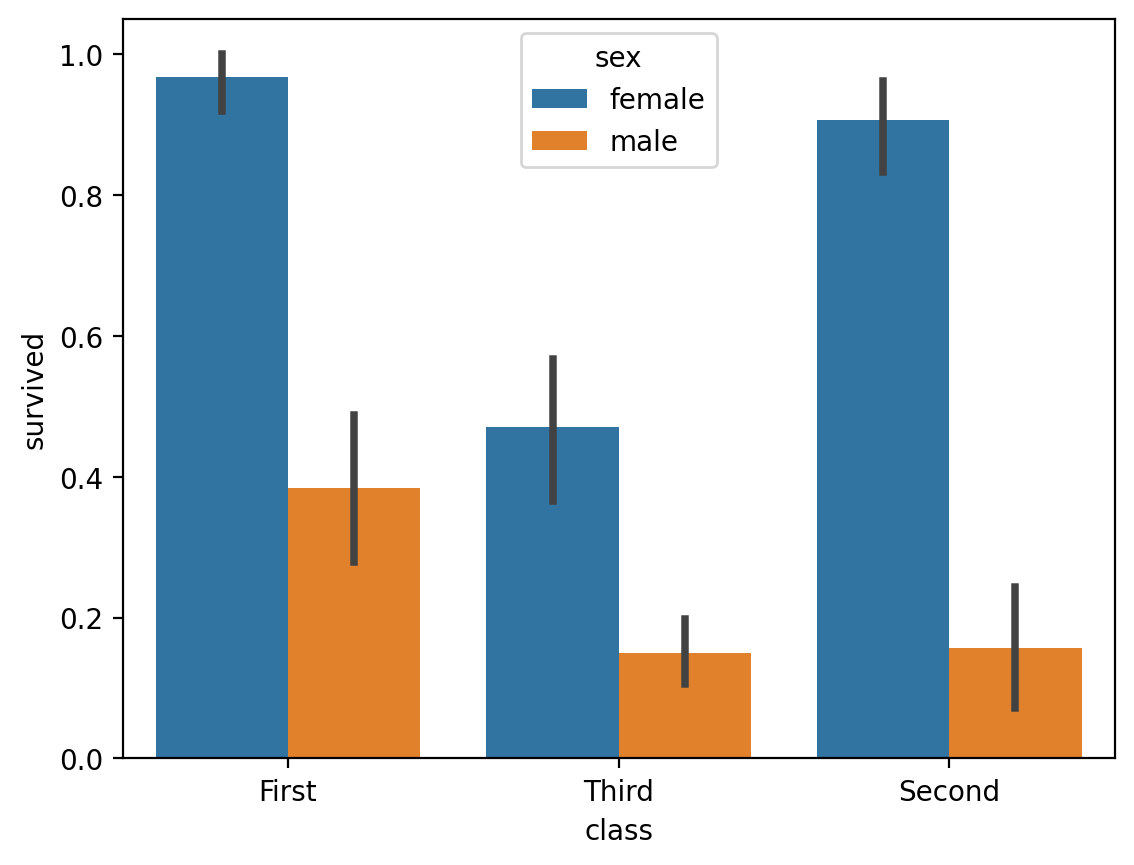

In [58]:
target = 'survived'
df = train_titanic
col = 'sex'
sns.barplot(x='class', y=target, hue=col, data=df, estimator='mean')

AttributeError: Rectangle.set() got an unexpected keyword argument 'col'

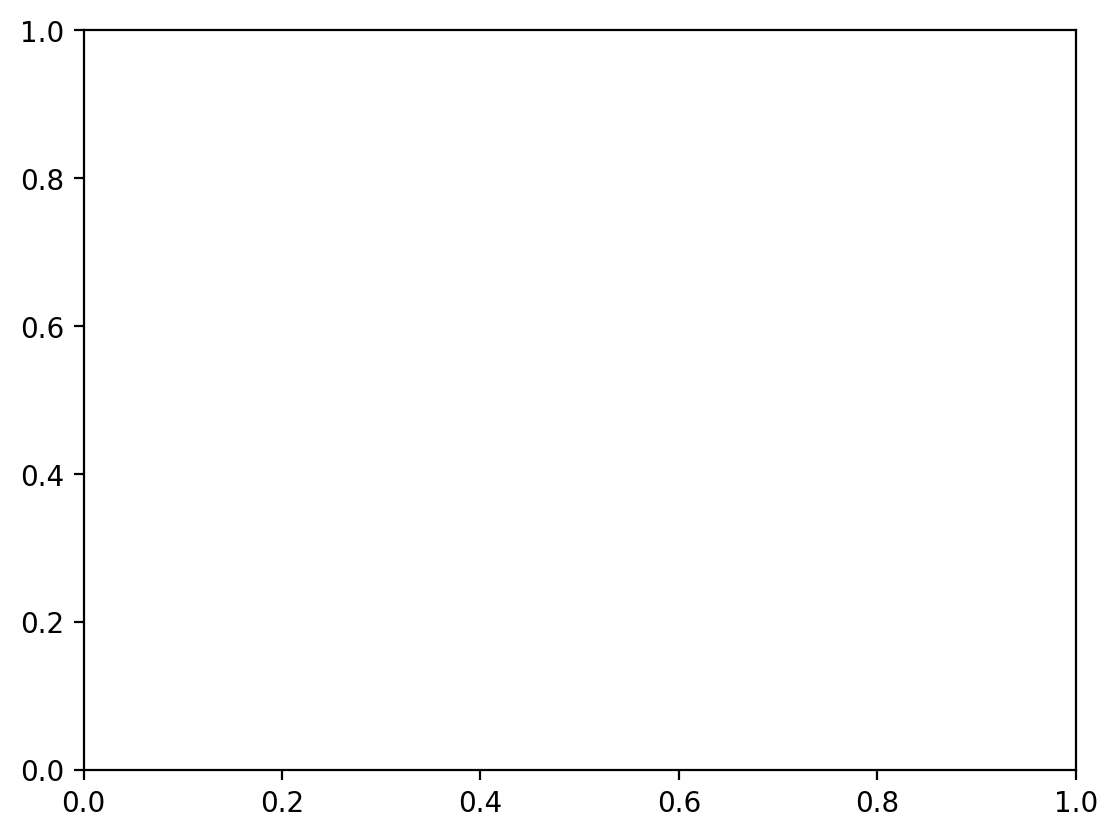

In [60]:
sns.barplot(x=col, y=target, hue='class', col='alone', data=df, estimator='mean')

In [73]:
# mask = np.zeros_like(train_titanic.corr(numeric_only=True))
# mask[np.triu_indices_from(mask)] = True
# with sns.axes_style("white"):
#     f, ax = plt.subplots(figsize=(14, 8))
#     ax = sns.heatmap(train_titanic.corr(numeric_only=True), mask=mask, cmap='coolwarm',
#                      linewidths=.5, annot=True)

- Determine if certain columns should be dropped

- Determine if it would be valuable to bin some numeric columns


- Determine if it would be valuable to combine multiple columns into one.

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

#### Part 3

Explore your telco data to discover drivers of churn

In [14]:
telco = p.prep_telco()
train_telco, val_telco, test_telco = p.split_data(telco, test_size=.15,
                                                  validate_size=.15, stratify_col='churn') 
train_telco.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_male,multiple_lines_no_phone_service,multiple_lines_yes,online_security_no_internet_service,online_security_yes,online_backup_no_internet_service,online_backup_yes,device_protection_no_internet_service,device_protection_yes,tech_support_no_internet_service,tech_support_yes,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no_internet_service,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_(automatic),payment_type_electronic_check,payment_type_mailed_check
6861,9746-YKGXB,Male,0,1,1,52,0,No phone service,Yes,No,Yes,No,No,Yes,0,44.25,2276.1,0,One year,DSL,Bank transfer (automatic),1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
6720,9546-CQJSU,Female,0,0,0,2,1,Yes,No,No,Yes,No,Yes,No,1,91.40,193.6,1,Month-to-month,Fiber optic,Electronic check,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0


In [22]:
cat_cols, cont_cols = e.get_cat_and_cont_cols(train_telco)
cat_cols, cont_cols
cat_cols = cat_cols[:17] # exclude encoded cols
# cont_cols = cont_cols[1:] # exlude id's col
cat_cols, cont_cols

customer_id is continuous but not numeric. Check if column needs to be cleaned


(['gender',
  'senior_citizen',
  'partner',
  'dependents',
  'phone_service',
  'multiple_lines',
  'online_security',
  'online_backup',
  'device_protection',
  'tech_support',
  'streaming_tv',
  'streaming_movies',
  'paperless_billing',
  'churn',
  'contract_type',
  'internet_service_type',
  'payment_type'],
 ['customer_id', 'tenure', 'monthly_charges', 'total_charges'])

Univariate stats

Continuous

Descriptive Stats:



,tenure,monthly_charges,total_charges
count,4929.000000,4929.000000,4929.000000
mean,32.635220,64.491053,2286.799615
std,24.616606,30.082926,2264.974621
min,0.000000,18.250000,18.800000
25%,9.000000,35.350000,404.200000
50%,29.000000,70.100000,1398.600000
75%,56.000000,89.800000,3808.000000
max,72.000000,118.750000,8672.450000


------------------------------------------------------------ 
 TENURE 

Most Frequent Values:
1     433
72    251
2     152
Name: tenure, dtype: int64


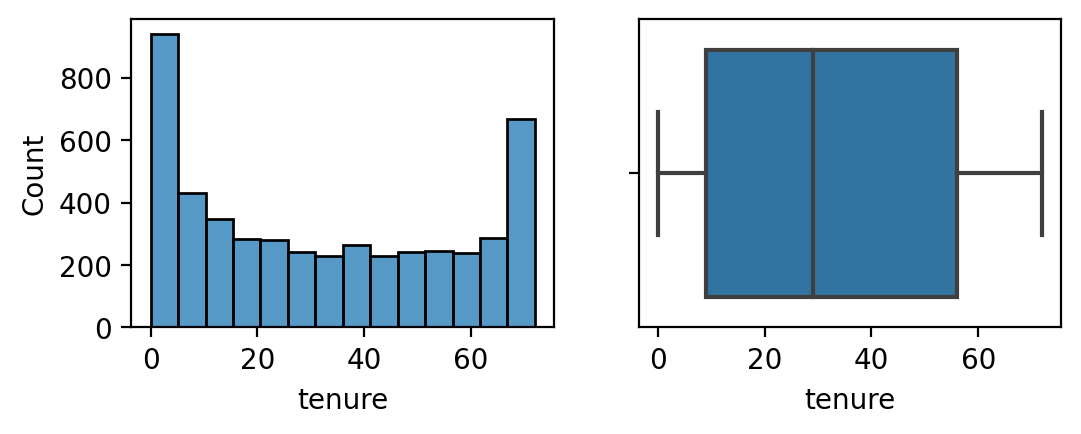


------------------------------------------------------------ 
 MONTHLY_CHARGES 

Most Frequent Values:
20.05    46
19.95    40
19.85    32
Name: monthly_charges, dtype: int64


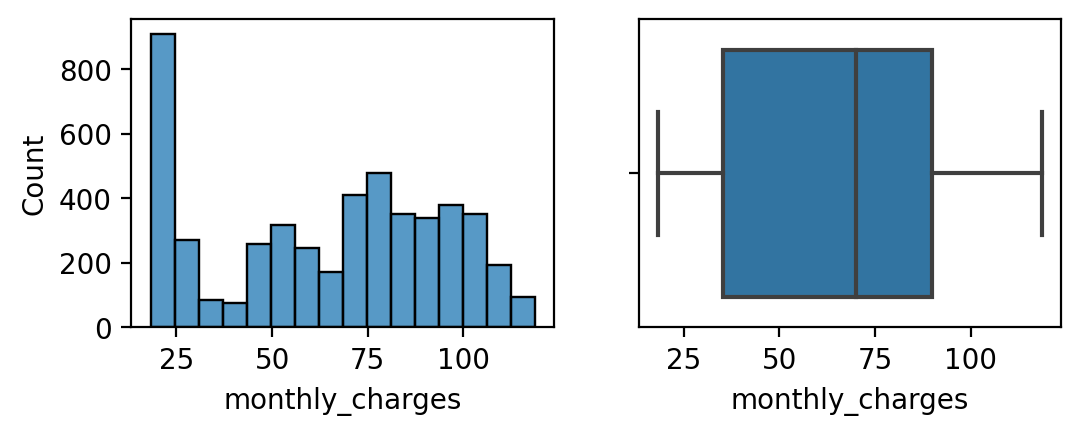


------------------------------------------------------------ 
 TOTAL_CHARGES 

Most Frequent Values:
20.20    10
19.75     8
19.90     8
Name: total_charges, dtype: int64


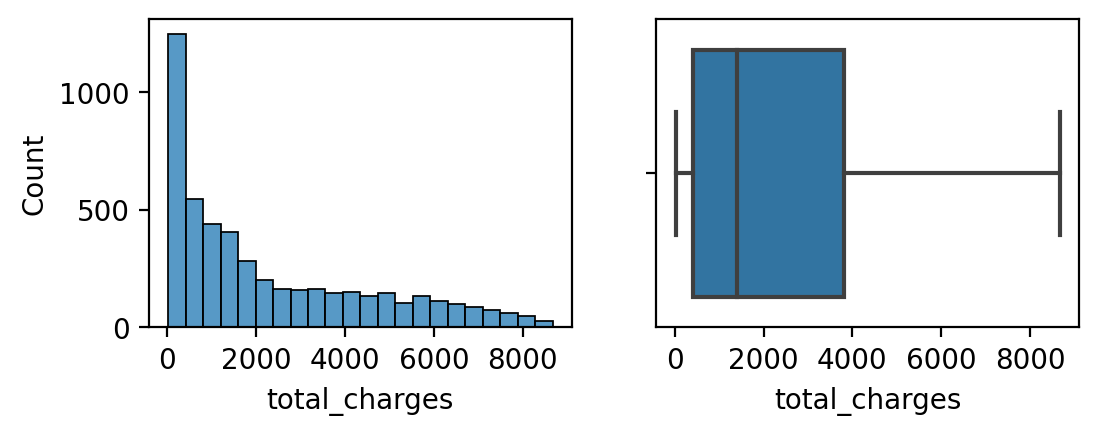

In [76]:
e.explore_univariate_continuous_cols(train_telco, cont_cols=cont_cols)

Categorical

GENDER


,gender,Count,Frequency
0,Male,2496,0.506391
1,Female,2433,0.493609


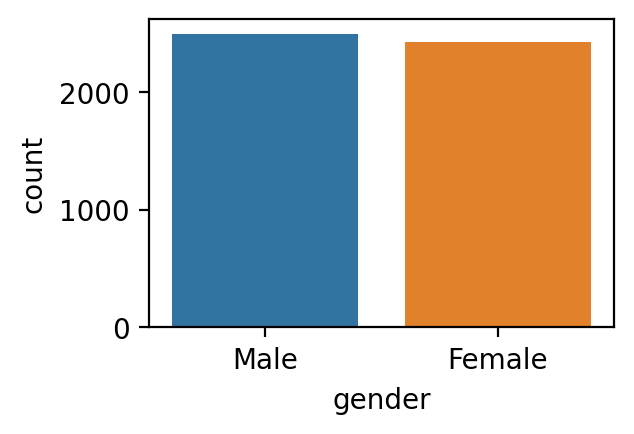


SENIOR_CITIZEN


,senior_citizen,Count,Frequency
0,0,4120,0.835869
1,1,809,0.164131


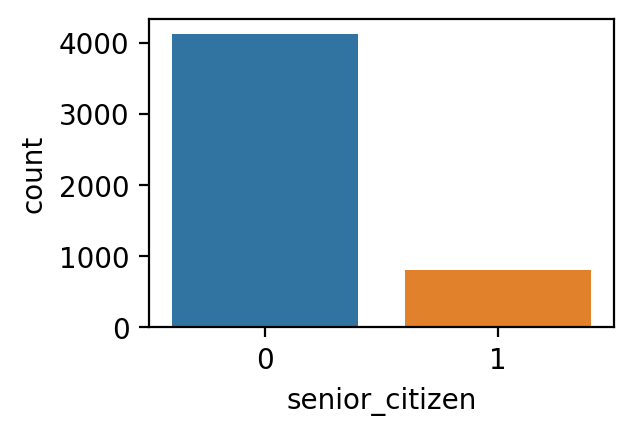


PARTNER


,partner,Count,Frequency
0,0,2544,0.516129
1,1,2385,0.483871


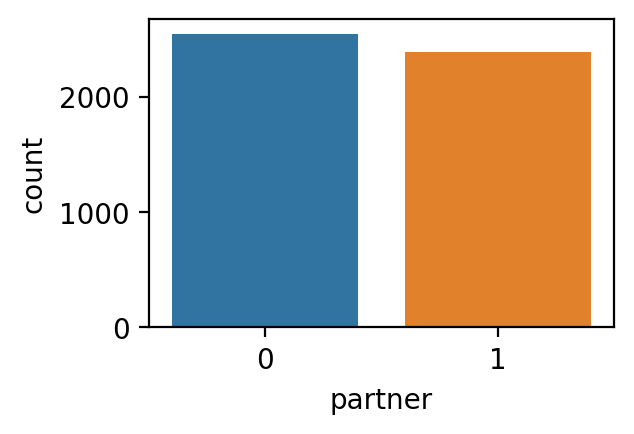


DEPENDENTS


,dependents,Count,Frequency
0,0,3466,0.703185
1,1,1463,0.296815


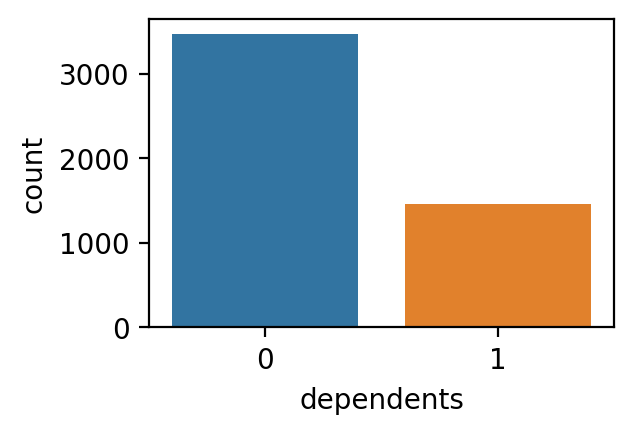


PHONE_SERVICE


,phone_service,Count,Frequency
0,1,4461,0.905052
1,0,468,0.094948


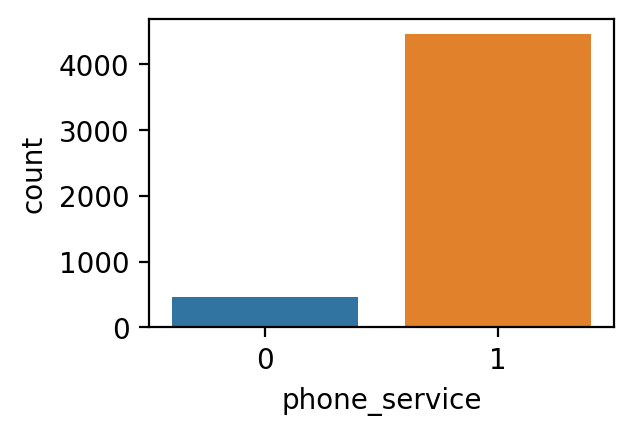


MULTIPLE_LINES


,multiple_lines,Count,Frequency
0,No,2396,0.486103
1,Yes,2065,0.418949
2,No phone service,468,0.094948


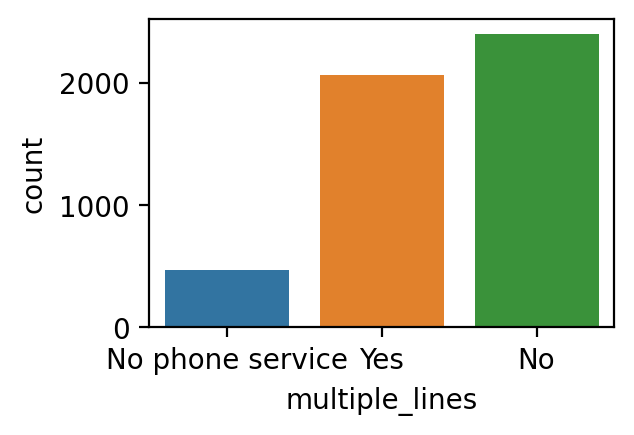


ONLINE_SECURITY


,online_security,Count,Frequency
0,No,2466,0.500304
1,Yes,1401,0.284236
2,No internet service,1062,0.215460


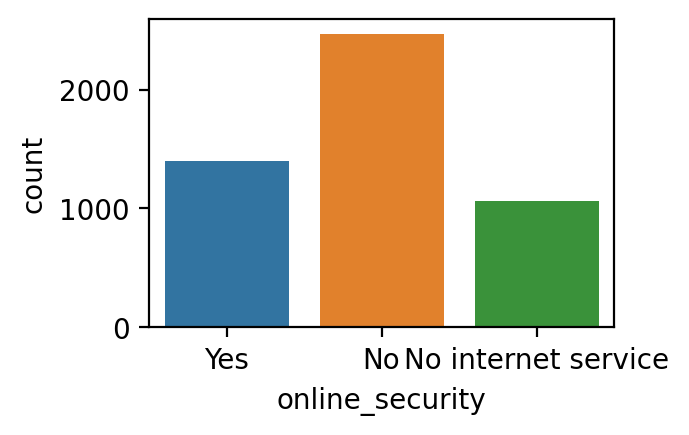


ONLINE_BACKUP


,online_backup,Count,Frequency
0,No,2153,0.436803
1,Yes,1714,0.347738
2,No internet service,1062,0.215460


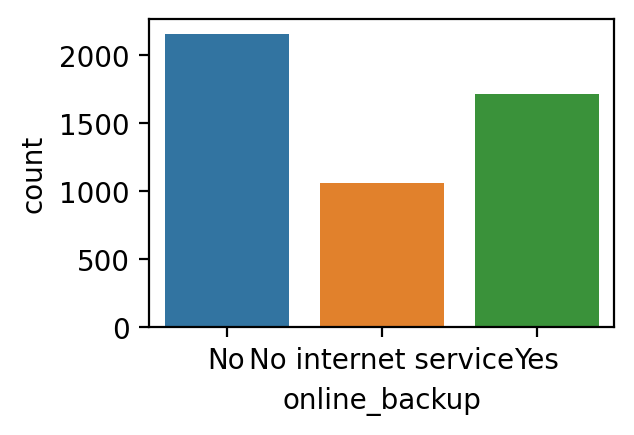


DEVICE_PROTECTION


,device_protection,Count,Frequency
0,No,2170,0.440252
1,Yes,1697,0.344289
2,No internet service,1062,0.215460


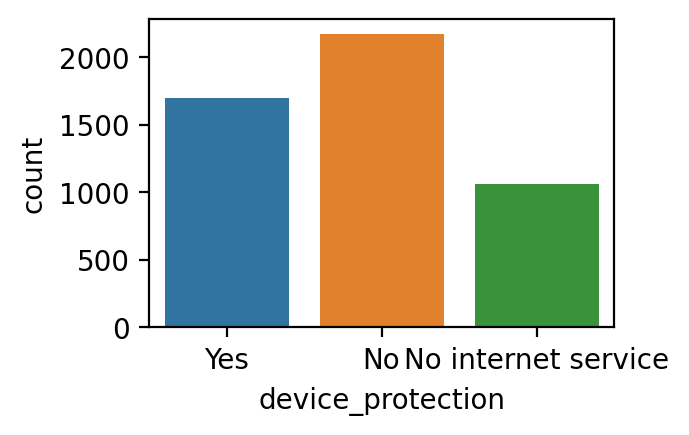


TECH_SUPPORT


,tech_support,Count,Frequency
0,No,2434,0.493812
1,Yes,1433,0.290728
2,No internet service,1062,0.215460


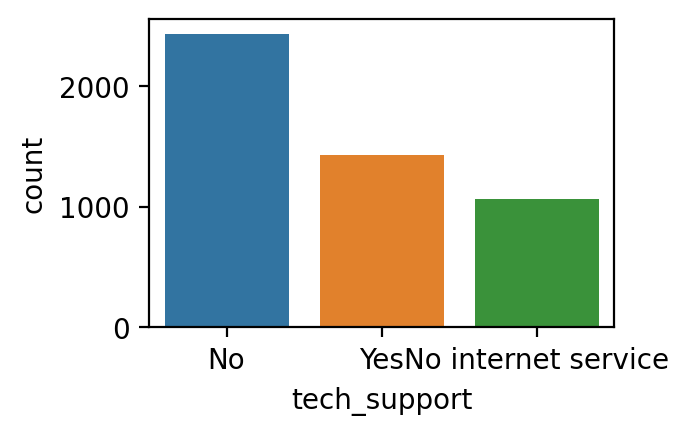


STREAMING_TV


,streaming_tv,Count,Frequency
0,No,1959,0.397444
1,Yes,1908,0.387097
2,No internet service,1062,0.215460


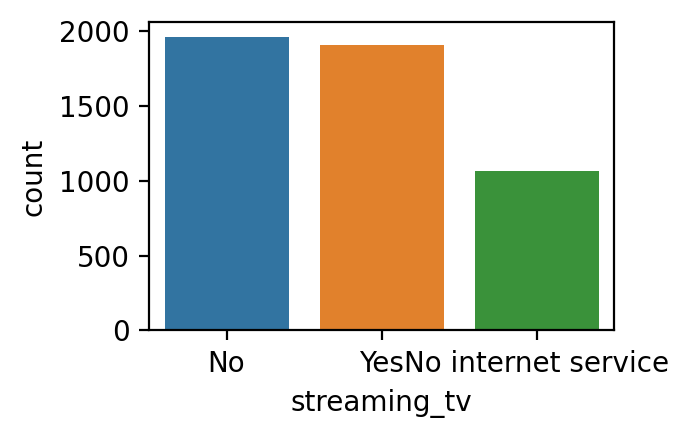


STREAMING_MOVIES


,streaming_movies,Count,Frequency
0,No,1959,0.397444
1,Yes,1908,0.387097
2,No internet service,1062,0.215460


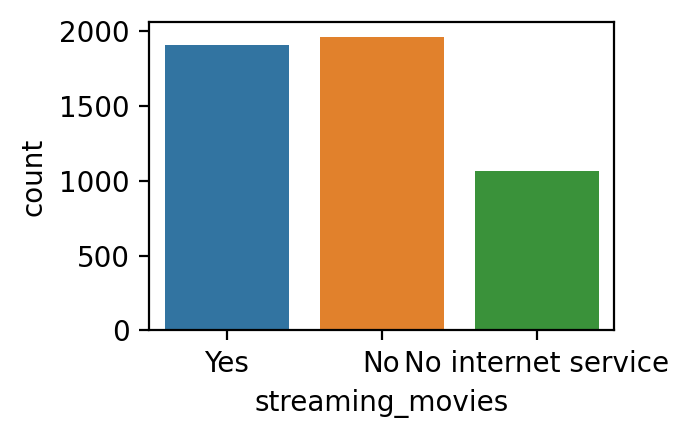


PAPERLESS_BILLING


,paperless_billing,Count,Frequency
0,1,2937,0.595861
1,0,1992,0.404139


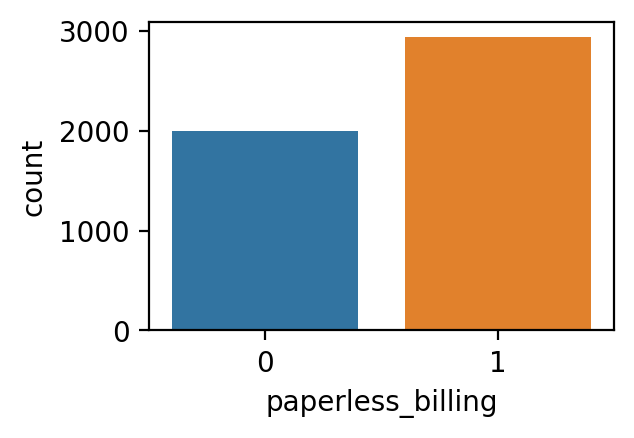


CHURN


,churn,Count,Frequency
0,0,3621,0.734632
1,1,1308,0.265368


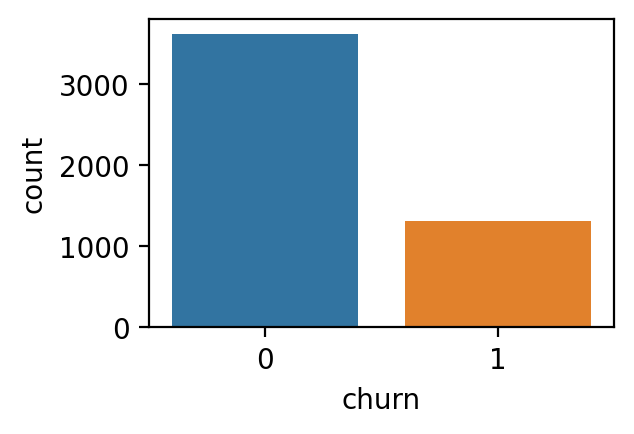


CONTRACT_TYPE


,contract_type,Count,Frequency
0,Month-to-month,2738,0.555488
1,Two year,1185,0.240414
2,One year,1006,0.204098


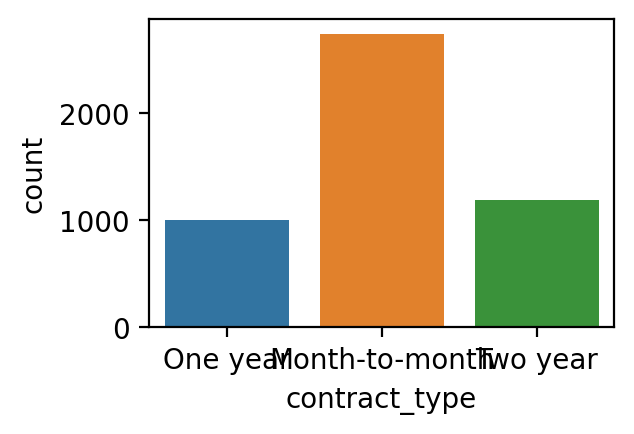


INTERNET_SERVICE_TYPE


,internet_service_type,Count,Frequency
0,Fiber optic,2171,0.440454
1,DSL,1696,0.344086
2,None,1062,0.215460


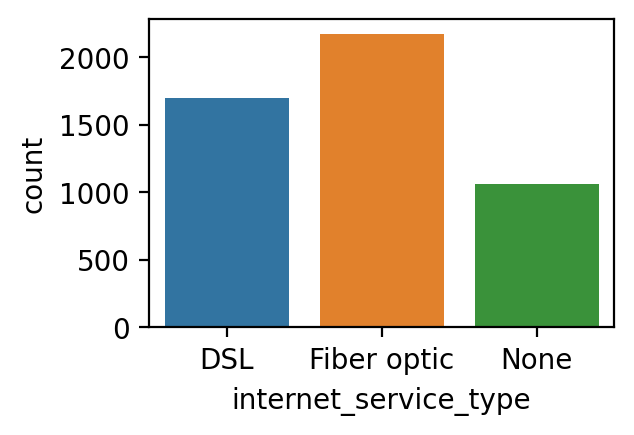


PAYMENT_TYPE


,payment_type,Count,Frequency
0,Electronic check,1665,0.337797
1,Mailed check,1125,0.228241
2,Bank transfer (automatic),1091,0.221343
3,Credit card (automatic),1048,0.212619


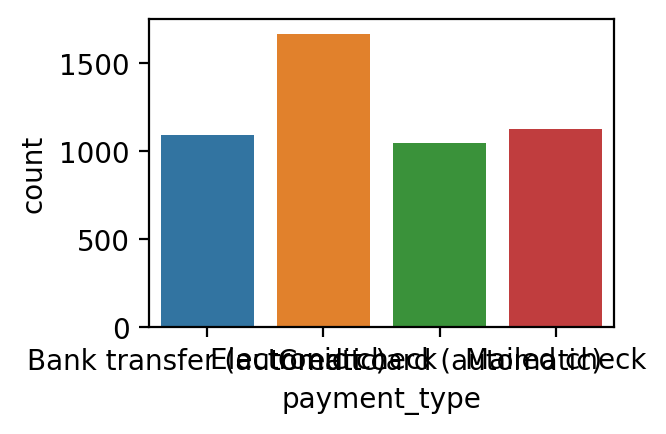


GENDER_MALE


,gender_male,Count,Frequency
0,1,2496,0.506391
1,0,2433,0.493609


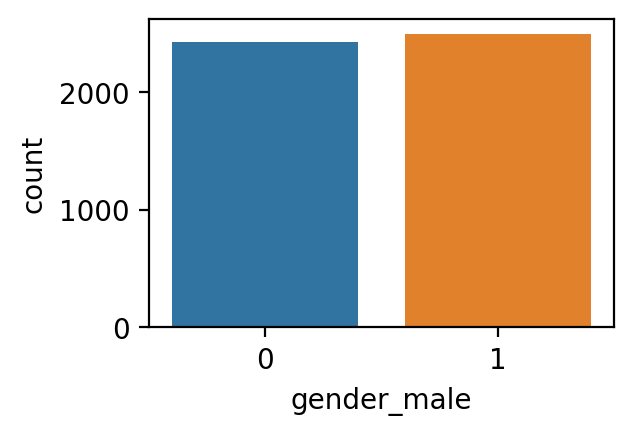


MULTIPLE_LINES_NO_PHONE_SERVICE


,multiple_lines_no_phone_service,Count,Frequency
0,0,4461,0.905052
1,1,468,0.094948


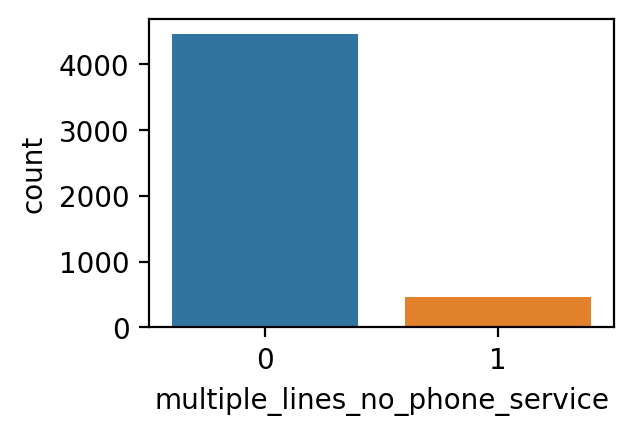


MULTIPLE_LINES_YES


,multiple_lines_yes,Count,Frequency
0,0,2864,0.581051
1,1,2065,0.418949


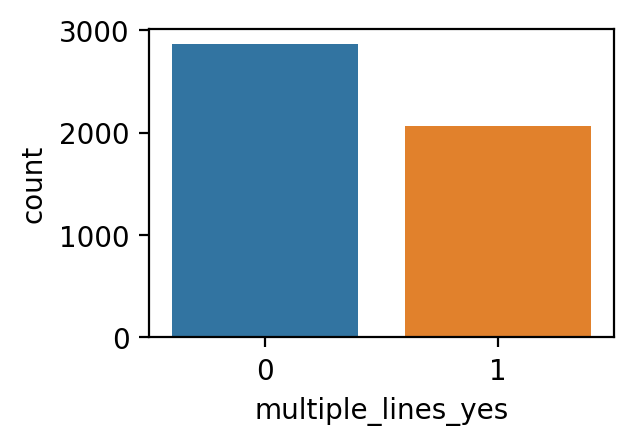


ONLINE_SECURITY_NO_INTERNET_SERVICE


,online_security_no_internet_service,Count,Frequency
0,0,3867,0.78454
1,1,1062,0.21546


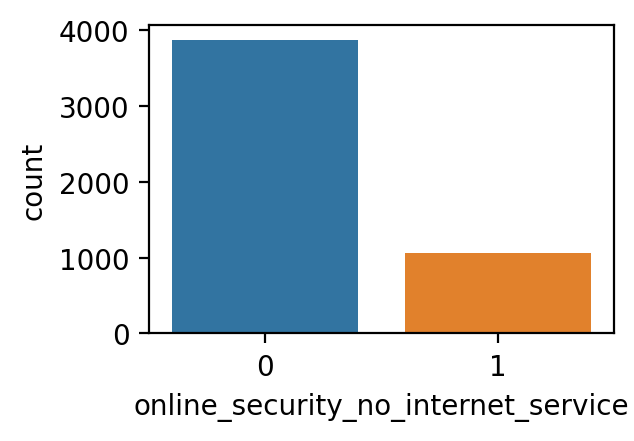


ONLINE_SECURITY_YES


,online_security_yes,Count,Frequency
0,0,3528,0.715764
1,1,1401,0.284236


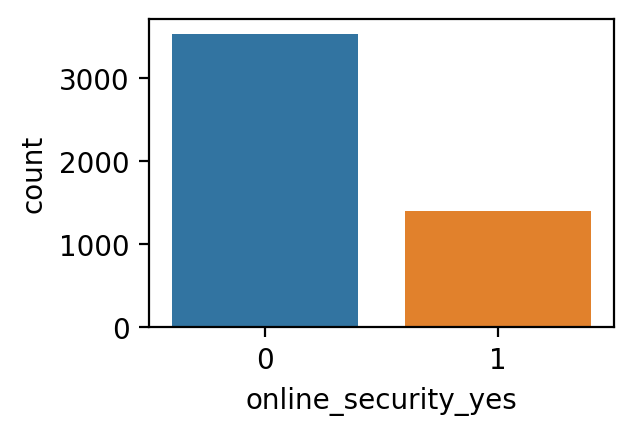


ONLINE_BACKUP_NO_INTERNET_SERVICE


,online_backup_no_internet_service,Count,Frequency
0,0,3867,0.78454
1,1,1062,0.21546


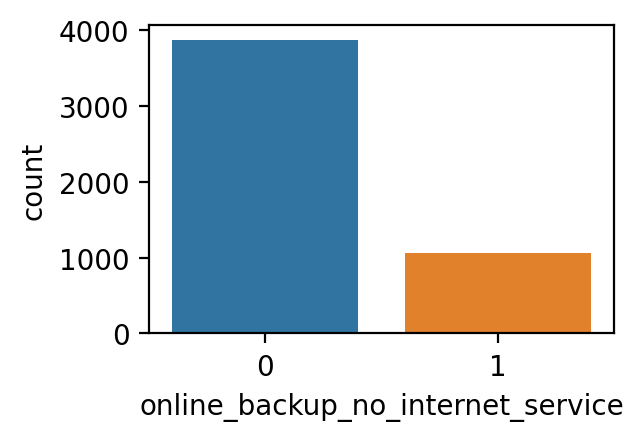


ONLINE_BACKUP_YES


,online_backup_yes,Count,Frequency
0,0,3215,0.652262
1,1,1714,0.347738


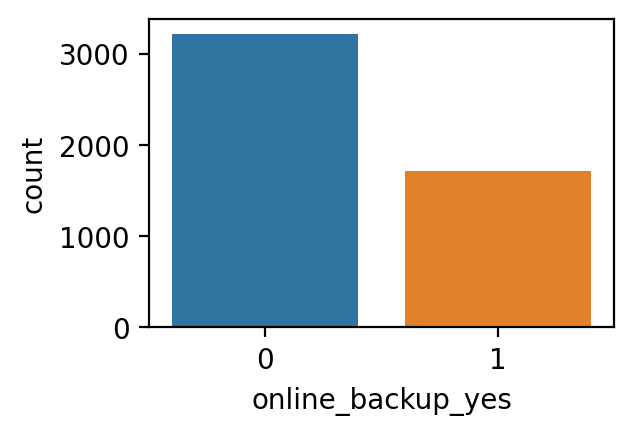


DEVICE_PROTECTION_NO_INTERNET_SERVICE


,device_protection_no_internet_service,Count,Frequency
0,0,3867,0.78454
1,1,1062,0.21546


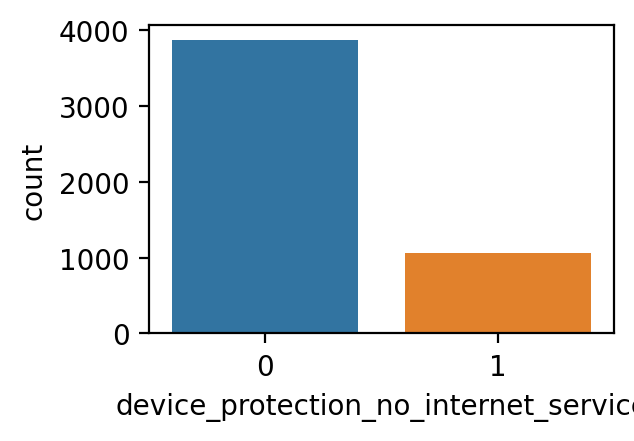


DEVICE_PROTECTION_YES


,device_protection_yes,Count,Frequency
0,0,3232,0.655711
1,1,1697,0.344289


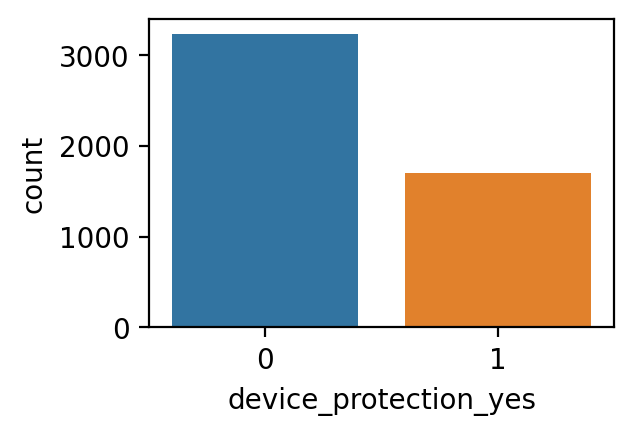


TECH_SUPPORT_NO_INTERNET_SERVICE


,tech_support_no_internet_service,Count,Frequency
0,0,3867,0.78454
1,1,1062,0.21546


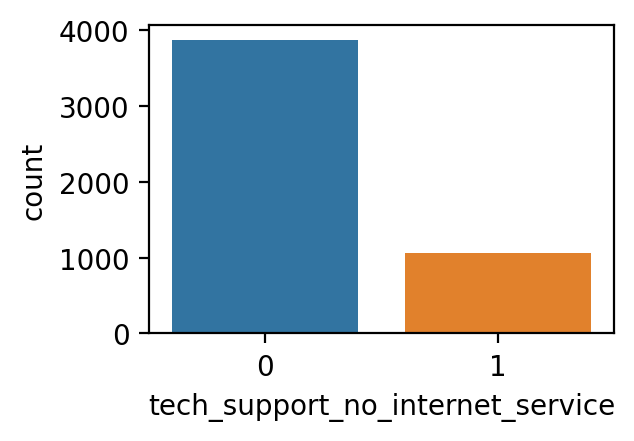


TECH_SUPPORT_YES


,tech_support_yes,Count,Frequency
0,0,3496,0.709272
1,1,1433,0.290728


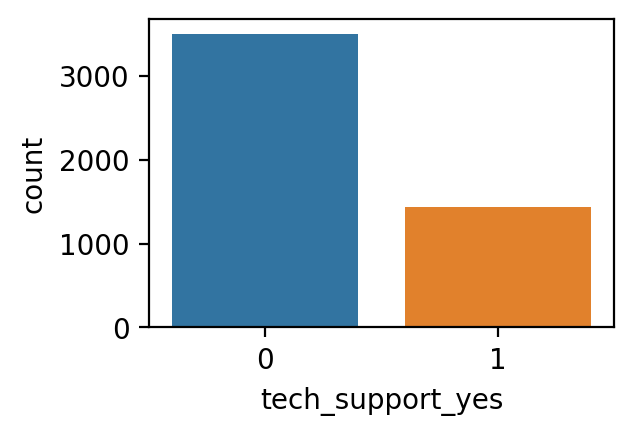


STREAMING_TV_NO_INTERNET_SERVICE


,streaming_tv_no_internet_service,Count,Frequency
0,0,3867,0.78454
1,1,1062,0.21546


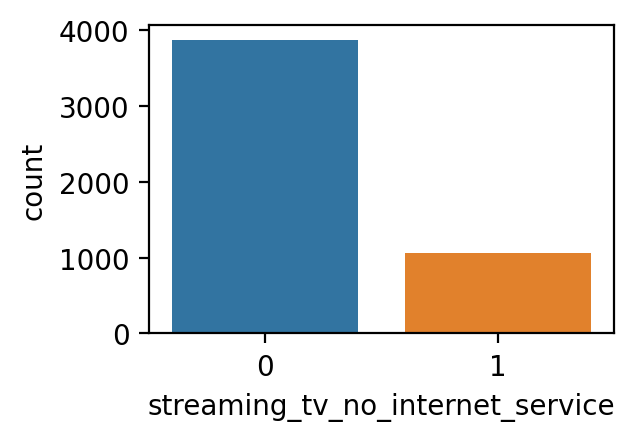


STREAMING_TV_YES


,streaming_tv_yes,Count,Frequency
0,0,3021,0.612903
1,1,1908,0.387097


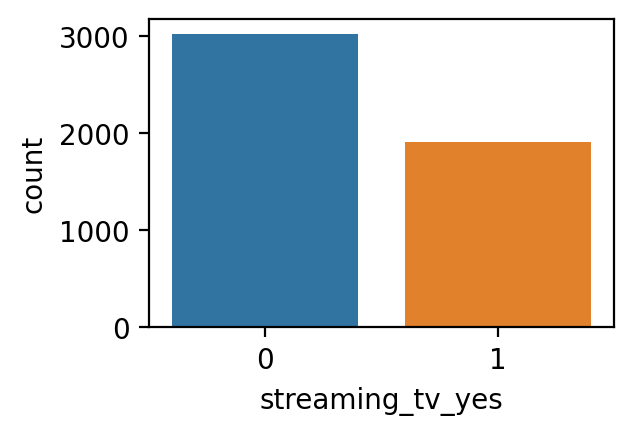


STREAMING_MOVIES_NO_INTERNET_SERVICE


,streaming_movies_no_internet_service,Count,Frequency
0,0,3867,0.78454
1,1,1062,0.21546


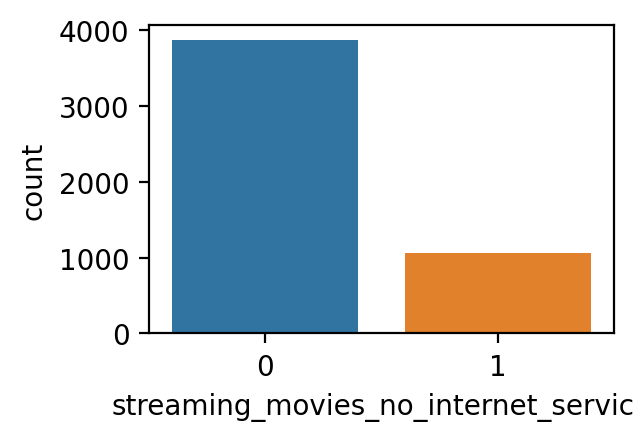


STREAMING_MOVIES_YES


,streaming_movies_yes,Count,Frequency
0,0,3021,0.612903
1,1,1908,0.387097


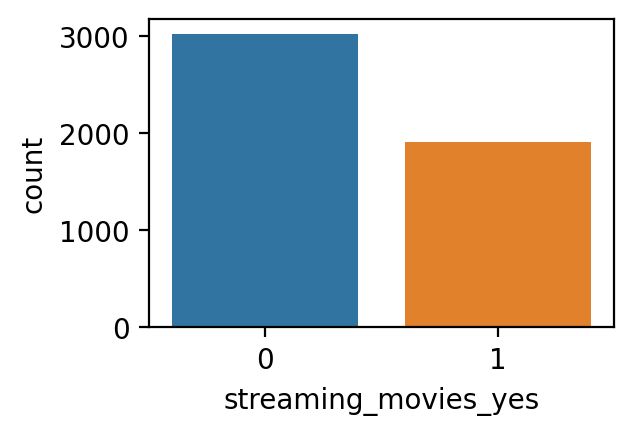


CONTRACT_TYPE_ONE_YEAR


,contract_type_one_year,Count,Frequency
0,0,3923,0.795902
1,1,1006,0.204098


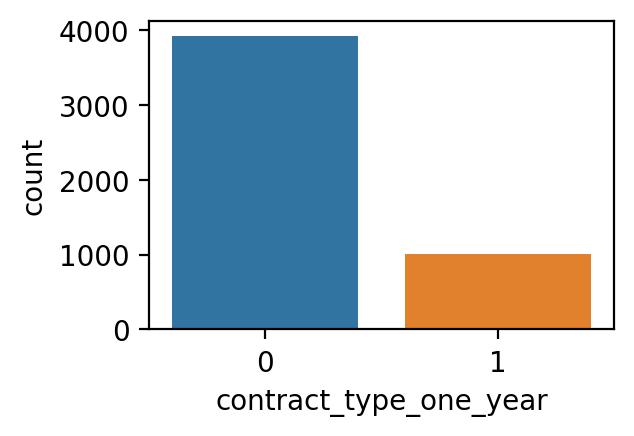


CONTRACT_TYPE_TWO_YEAR


,contract_type_two_year,Count,Frequency
0,0,3744,0.759586
1,1,1185,0.240414


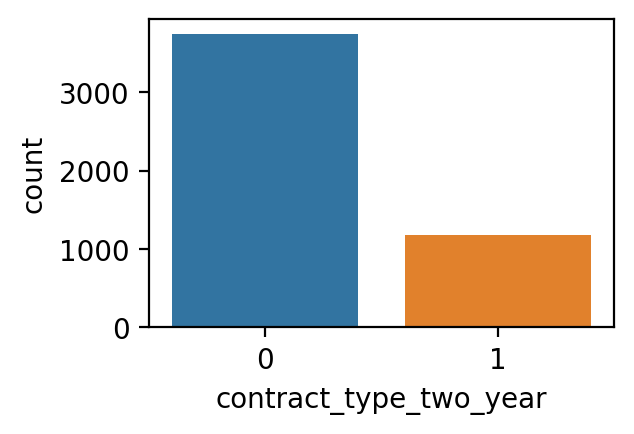


INTERNET_SERVICE_TYPE_FIBER_OPTIC


,internet_service_type_fiber_optic,Count,Frequency
0,0,2758,0.559546
1,1,2171,0.440454


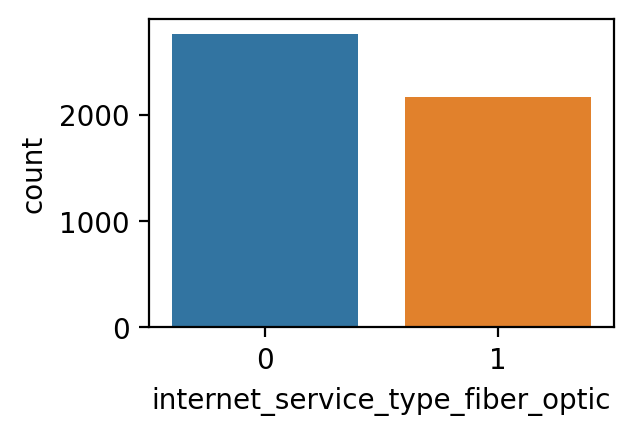


INTERNET_SERVICE_TYPE_NONE


,internet_service_type_none,Count,Frequency
0,0,3867,0.78454
1,1,1062,0.21546


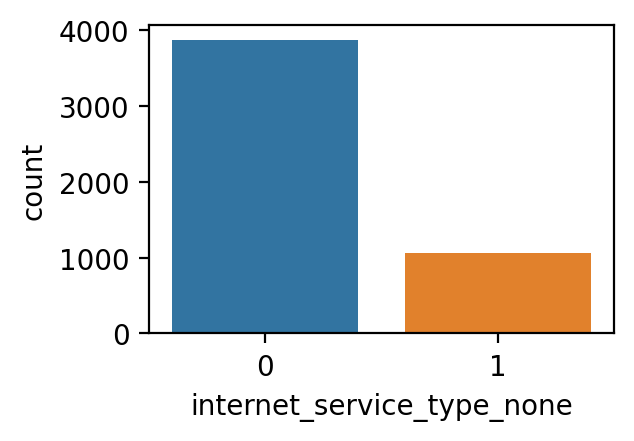


PAYMENT_TYPE_CREDIT_CARD_(AUTOMATIC)


,payment_type_credit_card_(automatic),Count,Frequency
0,0,3881,0.787381
1,1,1048,0.212619


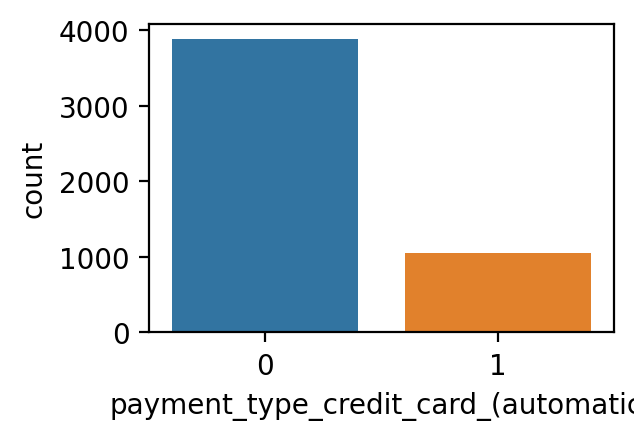


PAYMENT_TYPE_ELECTRONIC_CHECK


,payment_type_electronic_check,Count,Frequency
0,0,3264,0.662203
1,1,1665,0.337797


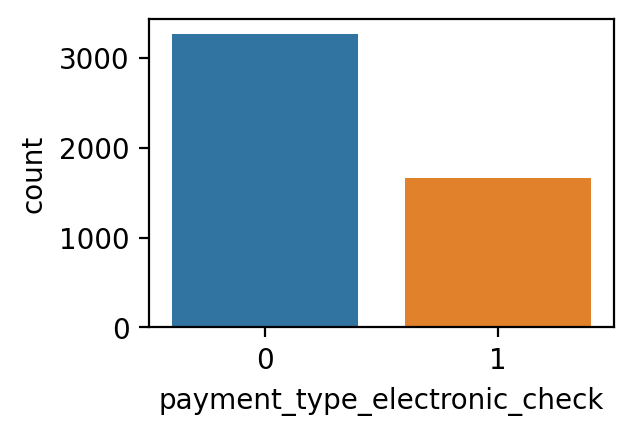


PAYMENT_TYPE_MAILED_CHECK


,payment_type_mailed_check,Count,Frequency
0,0,3804,0.771759
1,1,1125,0.228241


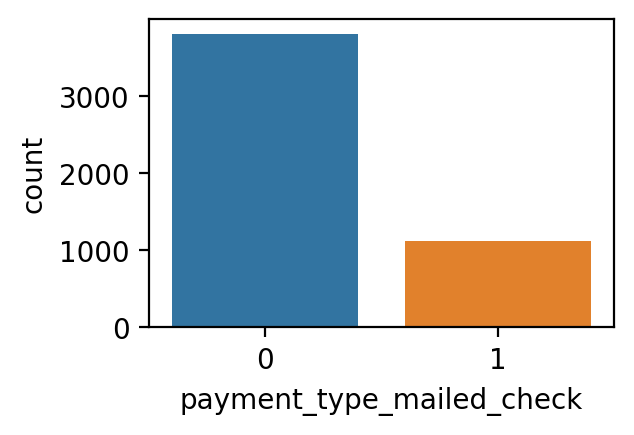

In [16]:
e.explore_univariate_categorical_cols(train_telco, cat_cols=cat_cols)

Bivariate Stats

Continuous features relation to churn (categorical target)

churn                            0            1
tenure          count  3621.000000  1308.000000
                mean     38.048882    17.648318
                std      24.089935    19.274727
                min       0.000000     1.000000
                25%      15.000000     2.000000
                50%      39.000000    10.000000
                75%      61.000000    28.000000
                max      72.000000    72.000000
monthly_charges count  3621.000000  1308.000000
                mean     61.232767    73.511124
                std      31.075707    25.033379
                min      18.250000    18.850000
                25%      25.100000    55.137500
                50%      64.200000    78.975000
                75%      88.050000    94.200000
                max     118.750000   118.350000
total_charges   count  3621.000000  1308.000000
                mean   2573.545996  1492.985665
                std    2330.549082  1854.984695
                min      18.800000    18.850000
                25%     602.900000   118.450000
                50%    1696.200000   668.700000
                75%    4264.250000  2259.325000
                max    8672.450000  8109.800000

Continuous feature correlations (Pearson R) to churn:


churn              1.000000
monthly_charges    0.180229
total_charges     -0.210663
tenure            -0.365946
Name: churn, dtype: float64

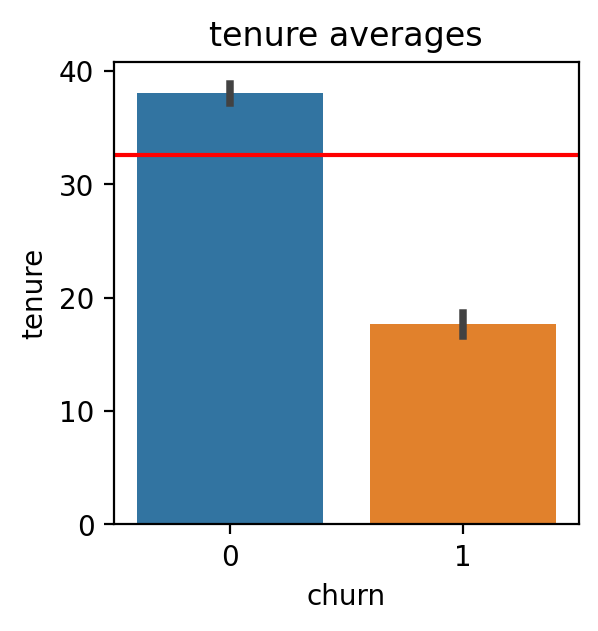

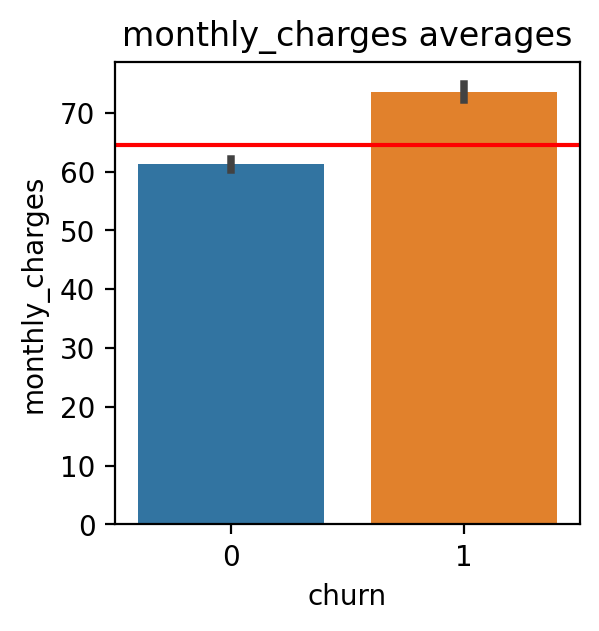

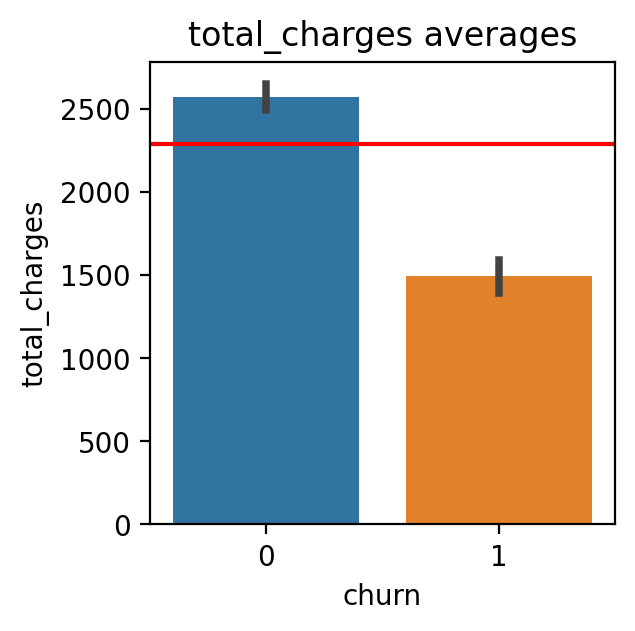

In [78]:
e.explore_bivariate_cont_to_cat_target(train_telco, 'churn', cont_cols=cont_cols)

<div style="border: 5px solid black;"></div>

Functions for `acquire.py`

In [79]:
def get_connection(db, user=env.user, host=env.host, password=env.pwd):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_titanic_data():
    filename = "data/titanic.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename, index=False)

        # Return the dataframe to the calling code
        return df 
    
def get_iris_data():
    filename = "data/iris.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('SELECT * FROM species JOIN measurements USING (species_id)',
                                                                 get_connection('iris_db'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename, index=False)

        # Return the dataframe to the calling code
        return df 
    
def get_telco_data():
    filename = "data/telco_churn.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('''SELECT * FROM customers
                            JOIN contract_types USING (contract_type_id)
                            JOIN internet_service_types USING (internet_service_type_id)
                            JOIN payment_types USING (payment_type_id)''',
                                                                 get_connection('telco_churn'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename, index=False)

        # Return the dataframe to the calling code
        return df 

<div style="border: 5px solid black;"></div>

Functions for `prepare.py`

In [80]:
def prep_iris(iris=a.get_iris_data()):
    '''
    accepts the raw iris data
    returns the data with the transformations above applied
    '''
    # Drop the species_id and measurement_id columns.
    cols_to_drop = ['species_id', 'measurement_id']
    iris = iris.drop(columns=cols_to_drop)

    # Rename the species_name column to just species.
    iris = iris.rename(columns={'species_name':'species'})
    
    # Create dummy variables of the species name and concatenate onto the iris dataframe. 
    dummy_df = pd.get_dummies(iris['species'], drop_first=True)
    iris = pd.concat([iris, dummy_df], axis=1)
    return iris

In [81]:
def prep_titanic(titanic=a.get_titanic_data()):
    '''
    accepts the raw titanic data
    returns the data with the transformations above applied
    '''
    # dropping embarked column
    cols_to_drop = ['embarked','pclass']
    titanic = titanic.drop(columns=cols_to_drop)
    
    # Encode the categorical columns.
    dummy_df = pd.get_dummies(titanic[['embark_town', 'class', 'sex']], dummy_na=False, drop_first=True)
    titanic = pd.concat([titanic, dummy_df], axis=1)
    
    # rename columns to be lowercased with underscores
    titanic.columns = [col.lower().replace(" ", "_") for col in titanic.columns]
    return titanic

In [82]:
def prep_telco(telco=a.get_telco_data()):
    '''
    accepts the raw telco data
    returns the data with the transformations above applied
    '''
    # Dropping foreign keys
    telco = telco.iloc[:,3:]
    
    # Encoding binary variables
    binary_cols = ['partner','dependents','phone_service', 'paperless_billing', 'churn']
    for col in binary_cols:
        telco[col] = telco[col].replace({'Yes': 1, 'No': 0})

    # Encoding multiclass variables
    dummy_df = pd.get_dummies(telco[['gender', 'multiple_lines', 'online_security', 'online_backup',
                                     'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
                                     'contract_type', 'internet_service_type', 'payment_type']],
                              dummy_na=False, drop_first=True)
    telco = pd.concat([telco, dummy_df], axis=1)
    
    # rename columns to be lowercased with underscores
    telco.columns = [col.lower().replace(" ", "_") for col in telco.columns]
    return telco

In [83]:
def split_data(df, test_size=.2, validate_size=.2, stratify_col=None, random_state=None):
    '''
    take in a DataFrame and return train, validate, and test DataFrames;.
    return train, validate, test DataFrames.
    '''
    # no stratification
    if stratify_col == None:
        # split test data
        train_validate, test = train_test_split(df, test_size=test_size, random_state=random_state)
        # split validate data
        train, validate = train_test_split(train_validate, test_size=validate_size, random_state=random_state)
    # stratify split
    else:
        # split test data
        train_validate, test = train_test_split(df, test_size=test_size, random_state=random_state,
                                                stratify = df[stratify_col])
        # split validate data
        train, validate = train_test_split(train_validate, test_size=validate_size,
                                           random_state=random_state,
                                           stratify=train_validate[stratify_col])       
    return train, validate, test

<div style="border: 5px solid black;"></div>

Explore functions

In [84]:
def get_cat_and_cont_cols(df, num_unique=10):
    '''
    Identifies columns from a df as continuous or categorical
    based on the number of unique values for each column.
    Returns a list of categorical columns and a list of continuous columns
    '''
    # store column in categorical list if there are `num_unique` or less unique values
    cat_cols = [col for col in df.columns if len(df[col].unique()) <= 10]
    # store column in categorical list if there are more than `num_unique` unique values 
    cont_cols = [col for col in df.columns if len(df[col].unique()) > 10]
    
    return cat_cols, cont_cols